# Decision Tree Algorithms for EMG Signal Classification using DWT
#### Kristian Wilianto (18/430195/PA/18708)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import pywt

## 1. Read Data

In [2]:
fs = 20000
length = 12500
indexx = np.arange(length)
time = np.arange(1/fs,(length/fs)+(1/fs),1/fs)

In [3]:
def bacaData(data_array,data_array2):
    y1 = data_array[2000:2000+length] #Mengambil langsung dari tengah karena pada titik nol terkadang sinyalnya tidak bagus
    plt.figure(figsize=(20,6))
    plt.plot(time,y1)
    plt.title('Brachial Biseps')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    
    y2 = data_array2[2000:2000+length]
    plt.figure(figsize=(20,6))
    plt.plot(time,y2)
    plt.title('Vestus Medialis')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')

    data = {'Time':time,'Amplitude(Brachial Biceps)':y1,'Amplitude(Vestus Medialis)':y2}
    df = pd.DataFrame(data, index =indexx)
    print(df)
    return y1,y2,df

In [4]:
channel = ['Amplitude(Brachial Biceps)', 'Amplitude(Vestus Medialis)']

def Scaling(df):
    # Standarisasi data
    xx = df.loc[:, channel].values
    xx = StandardScaler().fit_transform(xx)
    return xx

## 2. Denoising (PCA)

In [5]:
pca = PCA(n_components=2)
    
def cariPCA(dataframe,fitur):
    principalComponents = pca.fit_transform(fitur)
    
    principalDf = pd.DataFrame(data = principalComponents
                 , columns = ['principal component 1', 'principal component 2'])
      
    return principalDf

## 3. Decomposing (DWT)

In [6]:
def decomps(principalDf):
    coeffs1 = pywt.wavedec(principalDf.iloc[:,0],'db4',level=6)
    coeffs2 = pywt.wavedec(principalDf.iloc[:,1],'db4',level=6)
    return coeffs1,coeffs2

### Ekstraksi Ciri

In [14]:
def Ekstrak1(coeffs1,coeffs2):
    m = []
    ave = []
    std = []
    for i in range(len(coeffs1)):
        #Cari mean
        total = 0
        for j in range(len(coeffs1[i])):
            total += coeffs1[i][j]
        mean = total/len(coeffs1[i])
        m.append(mean)
        
        #Cari average power
        total2 = 0
        for j in range(len(coeffs1[i])):
            total2 += ((coeffs1[i][j])**2)
        avepow = total2/len(coeffs1[i])
        ave.append(avepow)
        
        #Cari standar deviasi
        total3 = 0
        for j in range(len(coeffs1[i])):
            stand = np.std([coeffs1[i]])
        std.append(stand)
       
    for i in range(len(coeffs2)):
        total = 0
        for j in range(len(coeffs2[i])):
            total += coeffs2[i][j]
        mean = total/len(coeffs2[i])
        m.append(mean)

        total2 = 0
        for j in range(len(coeffs2[i])):
            total2 += (coeffs2[i][j])**2
        avepow = total2/len(coeffs2[i])
        ave.append(avepow)
        
        total3 = 0
        for j in range(len(coeffs2[i])):
            stand = np.std([coeffs2[i]])
        std.append(stand)

    ciri = np.array([m,ave,std]).T 
    return ciri

## Iterasi bentuk data ciri

In [8]:
datafileALS = [['N2001A01BB01.bin','N2001A01VM01.bin'],['N2001A01BB02.bin','N2001A01VM02.bin'],
               ['N2001A01BB03.bin','N2001A01VM03.bin'],['N2001A01BB04.bin','N2001A01VM04.bin'],
               ['N2001A01BB05.bin','N2001A01VM05.bin'],['N2001A01BB06.bin','N2001A01VM06.bin'],
               ['N2001A01BB07.bin','N2001A01VM07.bin'],['N2001A01BB08.bin','N2001A01VM08.bin'],
               ['N2001A01BB09.bin','N2001A01VM09.bin'],['N2001A01BB10.bin','N2001A01VM10.bin']]

In [10]:
datafileNOR = [['N2001C01BB76.bin','N2001C01VM56.bin'],['N2001C01BB61.bin','N2001C01VM71.bin'],
               ['N2001C01BB62.bin','N2001C01VM72.bin'],['N2001C01BB63.bin','N2001C01VM73.bin'],
               ['N2001C01BB64.bin','N2001C01VM74.bin'],['N2001C03BB51.bin','N2001C03VM61.bin'],
               ['N2001C03BB52.bin','N2001C03VM62.bin'],['N2001C03BB53.bin','N2001C03VM63.bin'],
               ['N2001C03BB54.bin','N2001C03VM64.bin'],['N2001C03BB55.bin','N2001C03VM65.bin']]

In [11]:
datafileMYO = [['N2001M02BB02.bin','N2001M02VM01.bin'],['N2001M02BB03.bin','N2001M02VM02.bin'],
               ['N2001M02BB04.bin','N2001M02VM03.bin'],['N2001M02BB05.bin','N2001M02VM04.bin'],
               ['N2001M02BB06.bin','N2001M02VM05.bin'],['N2001M03BB01.bin','N2001M03VM01.bin'],
               ['N2001M03BB02.bin','N2001M03VM02.bin'],['N2001M03BB03.bin','N2001M03VM03.bin'],
               ['N2001M03BB04.bin','N2001M03VM04.bin'],['N2001M03BB05.bin','N2001M03VM05.bin']]

In [12]:
datatotal = [[datafileALS],[datafileNOR],[datafileMYO]]

          Time  Amplitude(Brachial Biceps)  Amplitude(Vestus Medialis)
0      0.00005                         119                       -5741
1      0.00010                         146                       -5766
2      0.00015                         123                       -5787
3      0.00020                          90                       -5825
4      0.00025                         114                       -5939
...        ...                         ...                         ...
12495  0.62480                         -68                        1435
12496  0.62485                         -45                        1374
12497  0.62490                         -71                        1245
12498  0.62495                         -61                        1306
12499  0.62500                        -105                        1267

[12500 rows x 3 columns]
          Time  Amplitude(Brachial Biceps)  Amplitude(Vestus Medialis)
0      0.00005                        -446         

<ipython-input-3-06f1390ee51f>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,6))
<ipython-input-3-06f1390ee51f>:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,6))


          Time  Amplitude(Brachial Biceps)  Amplitude(Vestus Medialis)
0      0.00005                        -111                        -946
1      0.00010                         -57                        -893
2      0.00015                        -112                        -926
3      0.00020                         -61                        -901
4      0.00025                         -85                        -941
...        ...                         ...                         ...
12495  0.62480                       -2217                         706
12496  0.62485                       -2134                         716
12497  0.62490                       -2064                         729
12498  0.62495                       -1967                         714
12499  0.62500                       -1753                         684

[12500 rows x 3 columns]


<ipython-input-3-06f1390ee51f>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,6))
<ipython-input-3-06f1390ee51f>:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,6))


          Time  Amplitude(Brachial Biceps)  Amplitude(Vestus Medialis)
0      0.00005                         -49                         832
1      0.00010                         -57                         778
2      0.00015                         -40                         825
3      0.00020                         -55                         783
4      0.00025                        -143                         833
...        ...                         ...                         ...
12495  0.62480                         119                         626
12496  0.62485                         110                         677
12497  0.62490                         116                         660
12498  0.62495                          94                         647
12499  0.62500                          60                         627

[12500 rows x 3 columns]


<ipython-input-3-06f1390ee51f>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,6))
<ipython-input-3-06f1390ee51f>:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,6))


          Time  Amplitude(Brachial Biceps)  Amplitude(Vestus Medialis)
0      0.00005                          14                         -24
1      0.00010                          56                         -77
2      0.00015                          37                        -134
3      0.00020                          41                        -227
4      0.00025                          55                        -302
...        ...                         ...                         ...
12495  0.62480                        -156                         802
12496  0.62485                        -131                         780
12497  0.62490                         -96                         858
12498  0.62495                        -123                         853
12499  0.62500                        -134                         855

[12500 rows x 3 columns]


<ipython-input-3-06f1390ee51f>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,6))
<ipython-input-3-06f1390ee51f>:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,6))


          Time  Amplitude(Brachial Biceps)  Amplitude(Vestus Medialis)
0      0.00005                        -216                          77
1      0.00010                        -227                          53
2      0.00015                        -166                          35
3      0.00020                        -213                          67
4      0.00025                        -221                          69
...        ...                         ...                         ...
12495  0.62480                        -204                          12
12496  0.62485                        -205                          24
12497  0.62490                        -218                          31
12498  0.62495                        -219                          33
12499  0.62500                        -206                         -13

[12500 rows x 3 columns]


<ipython-input-3-06f1390ee51f>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,6))
<ipython-input-3-06f1390ee51f>:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,6))


          Time  Amplitude(Brachial Biceps)  Amplitude(Vestus Medialis)
0      0.00005                         103                       -1023
1      0.00010                         124                       -1009
2      0.00015                         124                       -1061
3      0.00020                          92                       -1229
4      0.00025                         124                       -1364
...        ...                         ...                         ...
12495  0.62480                          91                         231
12496  0.62485                          75                         227
12497  0.62490                          86                         205
12498  0.62495                         123                         206
12499  0.62500                         134                         219

[12500 rows x 3 columns]


<ipython-input-3-06f1390ee51f>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,6))
<ipython-input-3-06f1390ee51f>:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,6))


          Time  Amplitude(Brachial Biceps)  Amplitude(Vestus Medialis)
0      0.00005                          86                          28
1      0.00010                          35                          25
2      0.00015                         -10                          73
3      0.00020                         103                          39
4      0.00025                         136                          20
...        ...                         ...                         ...
12495  0.62480                          83                        -149
12496  0.62485                         139                        -194
12497  0.62490                          71                        -152
12498  0.62495                          87                        -143
12499  0.62500                          57                        -204

[12500 rows x 3 columns]


<ipython-input-3-06f1390ee51f>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,6))
<ipython-input-3-06f1390ee51f>:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,6))


          Time  Amplitude(Brachial Biceps)  Amplitude(Vestus Medialis)
0      0.00005                       -1920                        1042
1      0.00010                       -2068                        1022
2      0.00015                       -2289                         828
3      0.00020                       -2488                         453
4      0.00025                       -2654                         287
...        ...                         ...                         ...
12495  0.62480                        1073                        -422
12496  0.62485                        1064                        -447
12497  0.62490                         992                        -454
12498  0.62495                         893                        -442
12499  0.62500                         824                        -438

[12500 rows x 3 columns]


<ipython-input-3-06f1390ee51f>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,6))
<ipython-input-3-06f1390ee51f>:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,6))


          Time  Amplitude(Brachial Biceps)  Amplitude(Vestus Medialis)
0      0.00005                         136                        -534
1      0.00010                         124                        -531
2      0.00015                         120                        -551
3      0.00020                          99                        -584
4      0.00025                          61                        -575
...        ...                         ...                         ...
12495  0.62480                          49                        -587
12496  0.62485                          77                        -631
12497  0.62490                          46                        -589
12498  0.62495                          73                        -644
12499  0.62500                          44                        -609

[12500 rows x 3 columns]


<ipython-input-3-06f1390ee51f>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,6))
<ipython-input-3-06f1390ee51f>:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,6))


          Time  Amplitude(Brachial Biceps)  Amplitude(Vestus Medialis)
0      0.00005                         257                        -214
1      0.00010                         176                        -234
2      0.00015                         219                        -221
3      0.00020                         241                        -354
4      0.00025                         263                        -354
...        ...                         ...                         ...
12495  0.62480                       -1562                        1251
12496  0.62485                       -1730                        1220
12497  0.62490                       -1919                        1141
12498  0.62495                       -1963                        1194
12499  0.62500                       -1744                        1125

[12500 rows x 3 columns]


<ipython-input-3-06f1390ee51f>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,6))
<ipython-input-3-06f1390ee51f>:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,6))


          Time  Amplitude(Brachial Biceps)  Amplitude(Vestus Medialis)
0      0.00005                         119                         384
1      0.00010                          96                         476
2      0.00015                         208                         523
3      0.00020                         155                         542
4      0.00025                         172                         525
...        ...                         ...                         ...
12495  0.62480                         246                         -82
12496  0.62485                         304                         -73
12497  0.62490                         390                         -63
12498  0.62495                         437                         -42
12499  0.62500                         484                         -36

[12500 rows x 3 columns]


<ipython-input-3-06f1390ee51f>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,6))
<ipython-input-3-06f1390ee51f>:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,6))


          Time  Amplitude(Brachial Biceps)  Amplitude(Vestus Medialis)
0      0.00005                        -295                         135
1      0.00010                        -269                         112
2      0.00015                        -234                         120
3      0.00020                        -211                         113
4      0.00025                        -190                         128
...        ...                         ...                         ...
12495  0.62480                          69                         169
12496  0.62485                         -13                          90
12497  0.62490                          -1                          83
12498  0.62495                         -81                          81
12499  0.62500                        -126                         131

[12500 rows x 3 columns]


<ipython-input-3-06f1390ee51f>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,6))
<ipython-input-3-06f1390ee51f>:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,6))


          Time  Amplitude(Brachial Biceps)  Amplitude(Vestus Medialis)
0      0.00005                         244                         -19
1      0.00010                         293                         -56
2      0.00015                         290                         -43
3      0.00020                         328                         -69
4      0.00025                         339                         -88
...        ...                         ...                         ...
12495  0.62480                          87                        -129
12496  0.62485                          17                        -101
12497  0.62490                          17                         -92
12498  0.62495                          18                         -74
12499  0.62500                          88                         -95

[12500 rows x 3 columns]


<ipython-input-3-06f1390ee51f>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,6))
<ipython-input-3-06f1390ee51f>:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,6))


          Time  Amplitude(Brachial Biceps)  Amplitude(Vestus Medialis)
0      0.00005                         195                        -211
1      0.00010                         179                        -244
2      0.00015                         199                        -256
3      0.00020                         174                        -289
4      0.00025                         139                        -314
...        ...                         ...                         ...
12495  0.62480                        -142                          31
12496  0.62485                        -168                          30
12497  0.62490                        -168                          23
12498  0.62495                        -154                          49
12499  0.62500                        -124                          44

[12500 rows x 3 columns]


<ipython-input-3-06f1390ee51f>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,6))
<ipython-input-3-06f1390ee51f>:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,6))


          Time  Amplitude(Brachial Biceps)  Amplitude(Vestus Medialis)
0      0.00005                        1148                           3
1      0.00010                        1144                         -29
2      0.00015                        1152                         -38
3      0.00020                        1133                         -66
4      0.00025                        1095                        -105
...        ...                         ...                         ...
12495  0.62480                         578                         -15
12496  0.62485                         567                         -20
12497  0.62490                         523                          21
12498  0.62495                         591                         -26
12499  0.62500                         572                          10

[12500 rows x 3 columns]


<ipython-input-3-06f1390ee51f>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,6))
<ipython-input-3-06f1390ee51f>:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,6))


          Time  Amplitude(Brachial Biceps)  Amplitude(Vestus Medialis)
0      0.00005                          -7                        -156
1      0.00010                         -53                        -175
2      0.00015                          -1                        -176
3      0.00020                          -8                        -181
4      0.00025                         -31                        -135
...        ...                         ...                         ...
12495  0.62480                         221                        -351
12496  0.62485                         236                        -279
12497  0.62490                         201                        -265
12498  0.62495                         219                        -279
12499  0.62500                         267                        -206

[12500 rows x 3 columns]


<ipython-input-3-06f1390ee51f>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,6))
<ipython-input-3-06f1390ee51f>:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,6))


          Time  Amplitude(Brachial Biceps)  Amplitude(Vestus Medialis)
0      0.00005                         -12                        -130
1      0.00010                          10                        -150
2      0.00015                           5                        -153
3      0.00020                          -4                        -153
4      0.00025                          35                        -126
...        ...                         ...                         ...
12495  0.62480                        -181                          -6
12496  0.62485                        -225                           9
12497  0.62490                        -183                          10
12498  0.62495                        -181                         -11
12499  0.62500                        -187                          37

[12500 rows x 3 columns]


<ipython-input-3-06f1390ee51f>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,6))
<ipython-input-3-06f1390ee51f>:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,6))


          Time  Amplitude(Brachial Biceps)  Amplitude(Vestus Medialis)
0      0.00005                         -12                         -31
1      0.00010                          26                          -5
2      0.00015                          13                         -23
3      0.00020                          70                          -5
4      0.00025                         140                          11
...        ...                         ...                         ...
12495  0.62480                          -8                        -135
12496  0.62485                          10                        -162
12497  0.62490                          -1                        -116
12498  0.62495                          -2                        -164
12499  0.62500                         -39                        -134

[12500 rows x 3 columns]


<ipython-input-3-06f1390ee51f>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,6))
<ipython-input-3-06f1390ee51f>:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,6))


          Time  Amplitude(Brachial Biceps)  Amplitude(Vestus Medialis)
0      0.00005                         -41                         426
1      0.00010                         -28                         421
2      0.00015                         -90                         447
3      0.00020                         -86                         432
4      0.00025                         -57                         428
...        ...                         ...                         ...
12495  0.62480                         -43                        1065
12496  0.62485                         -72                         934
12497  0.62490                         -69                         892
12498  0.62495                        -154                         814
12499  0.62500                        -163                         791

[12500 rows x 3 columns]


<ipython-input-3-06f1390ee51f>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,6))
<ipython-input-3-06f1390ee51f>:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,6))


          Time  Amplitude(Brachial Biceps)  Amplitude(Vestus Medialis)
0      0.00005                        -158                         -70
1      0.00010                        -215                        -131
2      0.00015                        -198                        -121
3      0.00020                        -201                         -74
4      0.00025                        -198                        -137
...        ...                         ...                         ...
12495  0.62480                        -112                        -286
12496  0.62485                        -107                        -257
12497  0.62490                         -94                        -255
12498  0.62495                        -122                        -312
12499  0.62500                         -91                        -241

[12500 rows x 3 columns]


<ipython-input-3-06f1390ee51f>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,6))
<ipython-input-3-06f1390ee51f>:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,6))


          Time  Amplitude(Brachial Biceps)  Amplitude(Vestus Medialis)
0      0.00005                          62                        -163
1      0.00010                          94                        -148
2      0.00015                          71                        -171
3      0.00020                          39                        -138
4      0.00025                          29                        -148
...        ...                         ...                         ...
12495  0.62480                        -145                          50
12496  0.62485                        -172                          83
12497  0.62490                        -173                          80
12498  0.62495                        -148                          46
12499  0.62500                        -142                          20

[12500 rows x 3 columns]


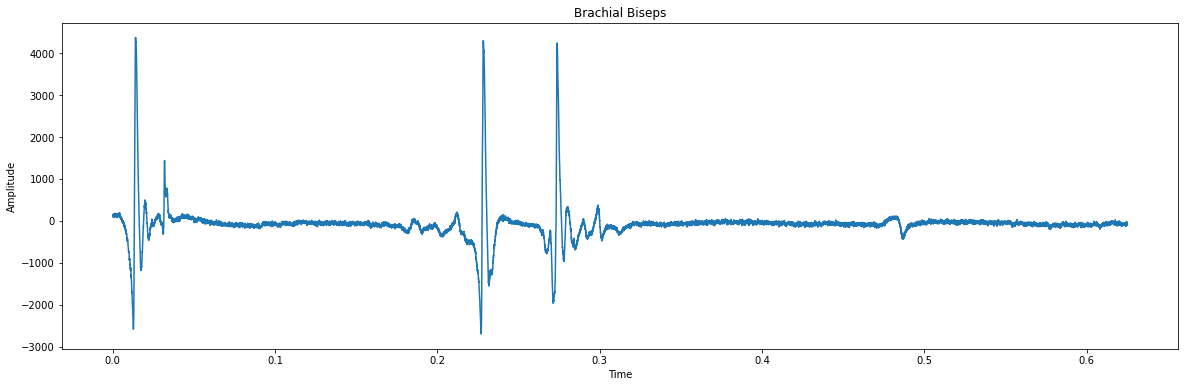

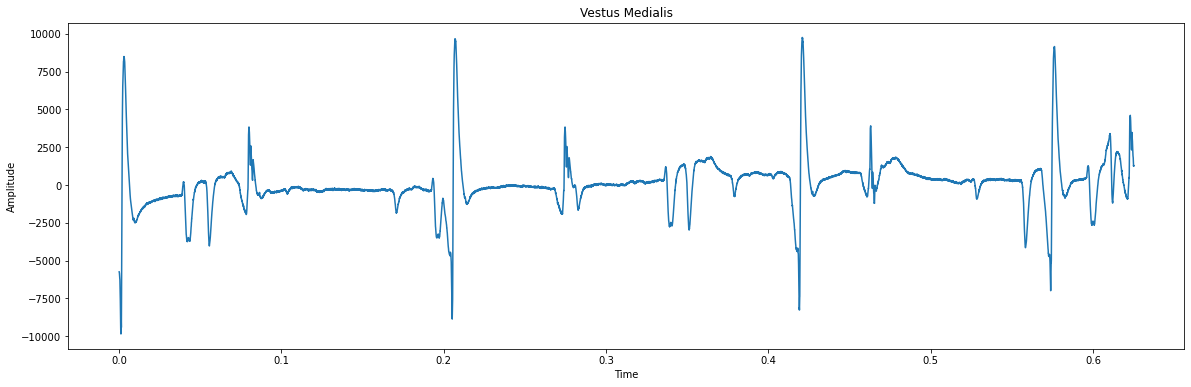

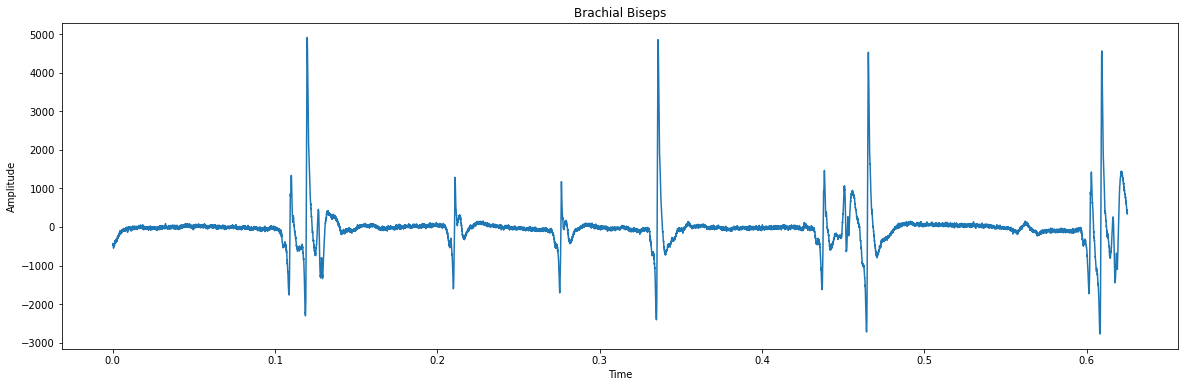

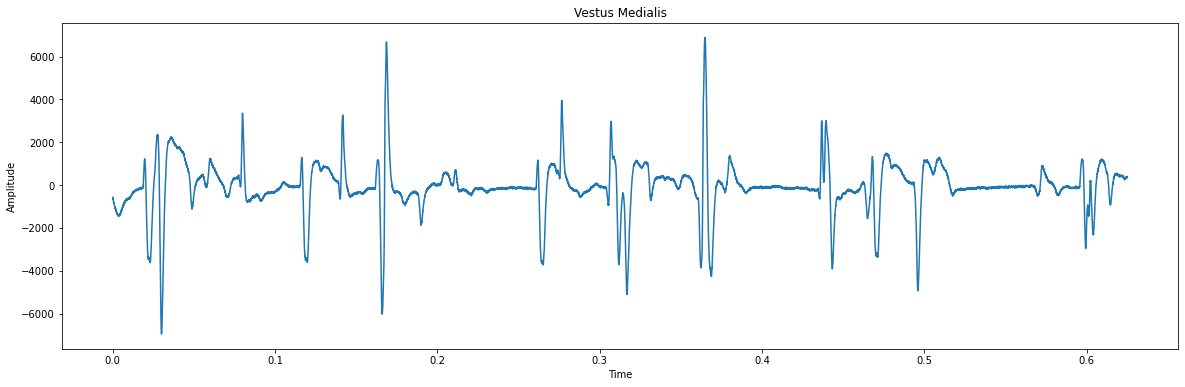

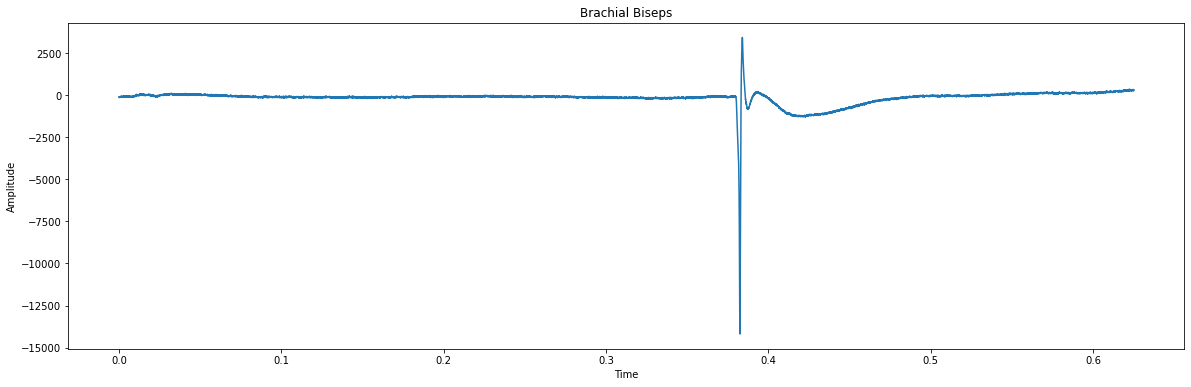

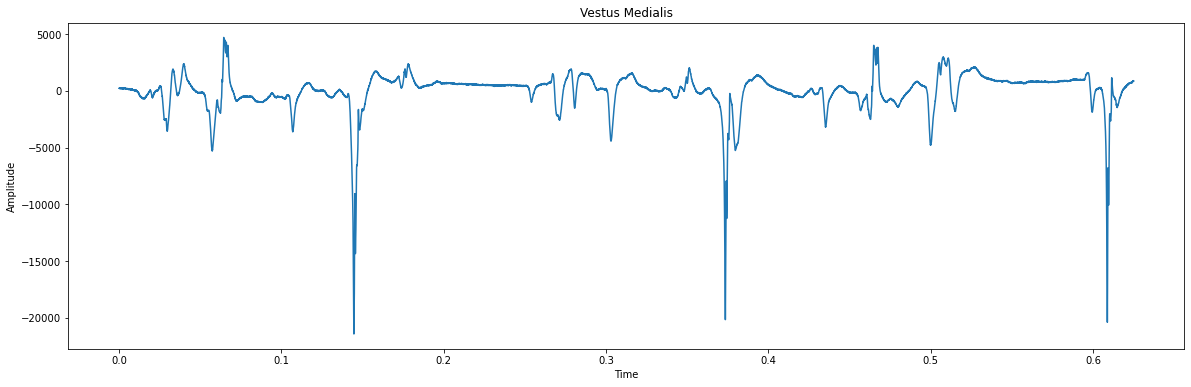

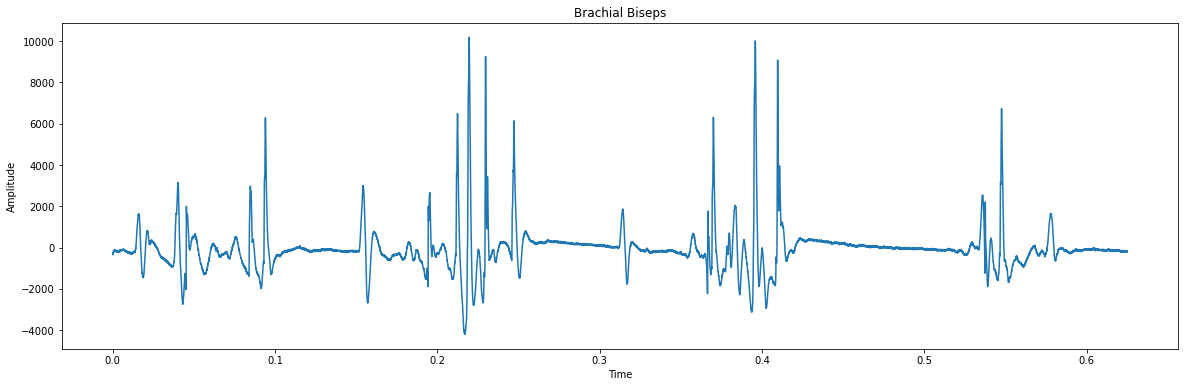

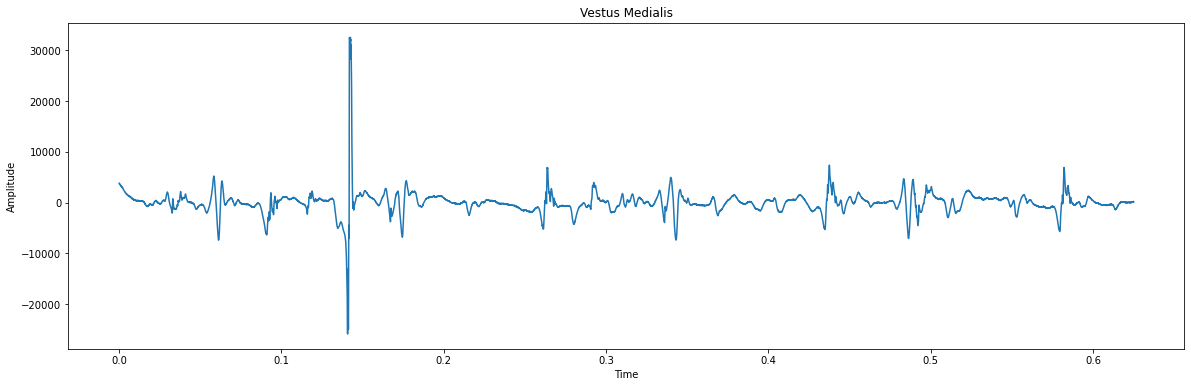

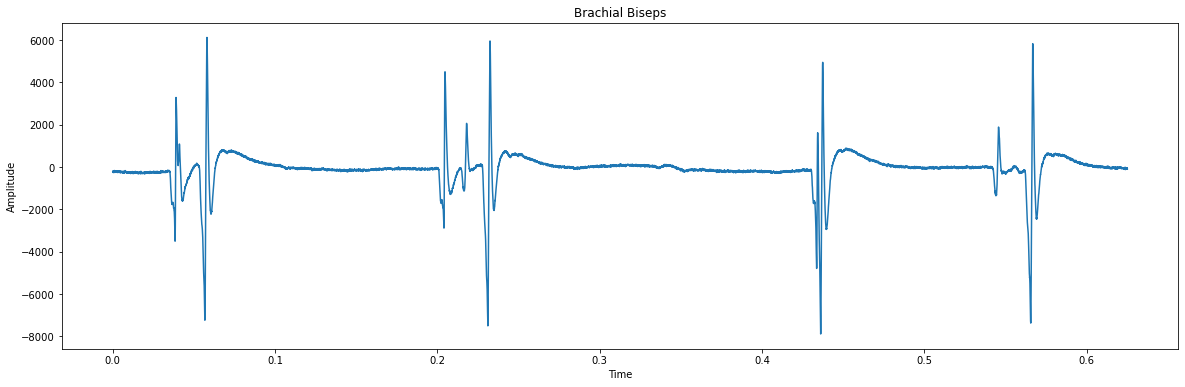

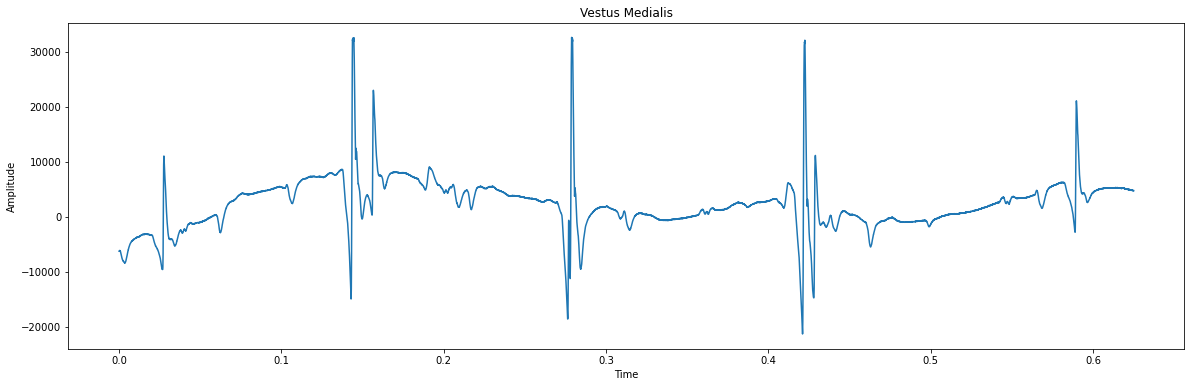

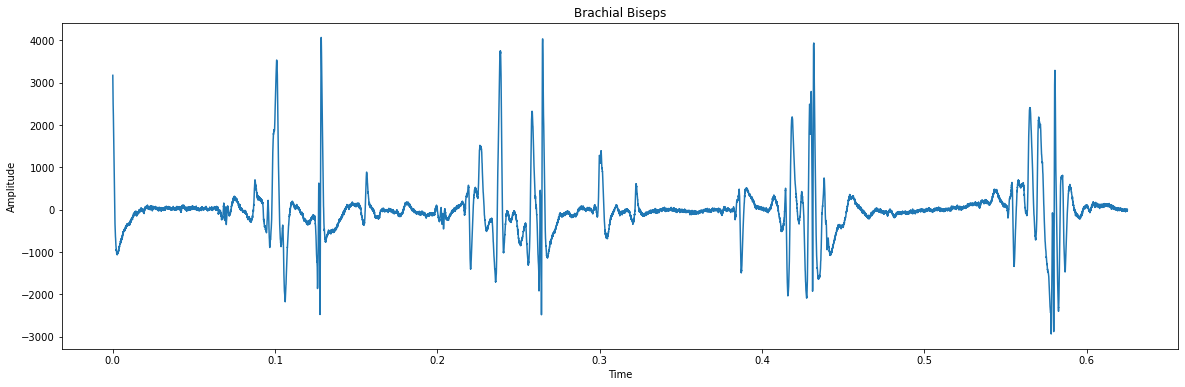

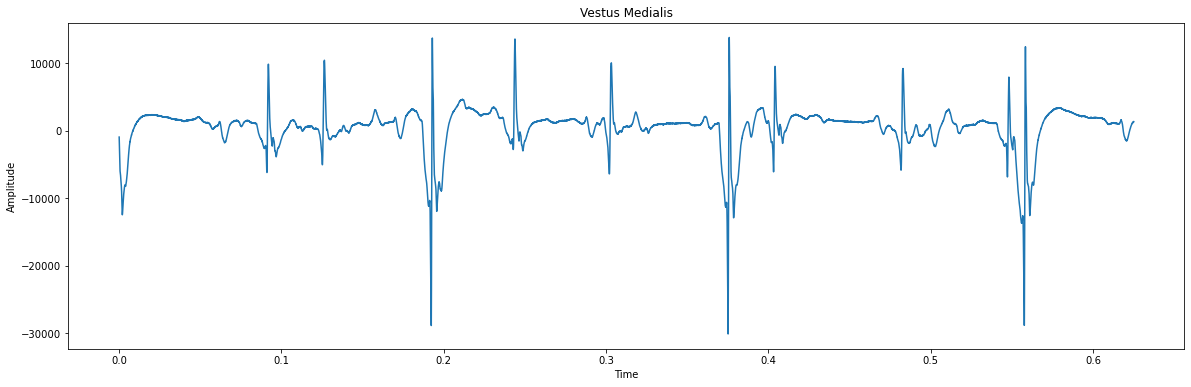

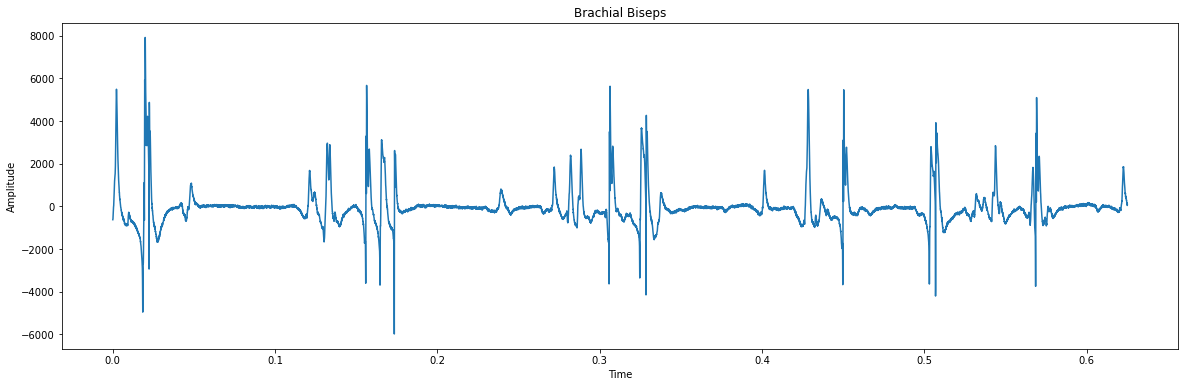

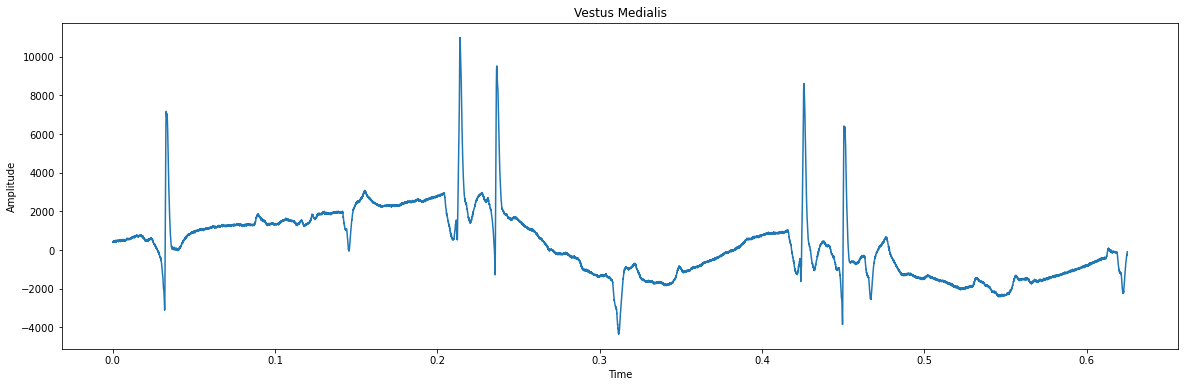

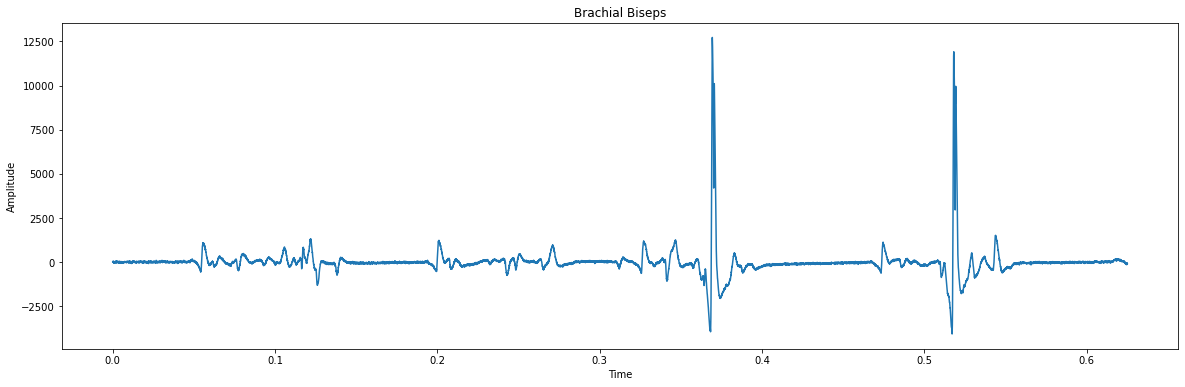

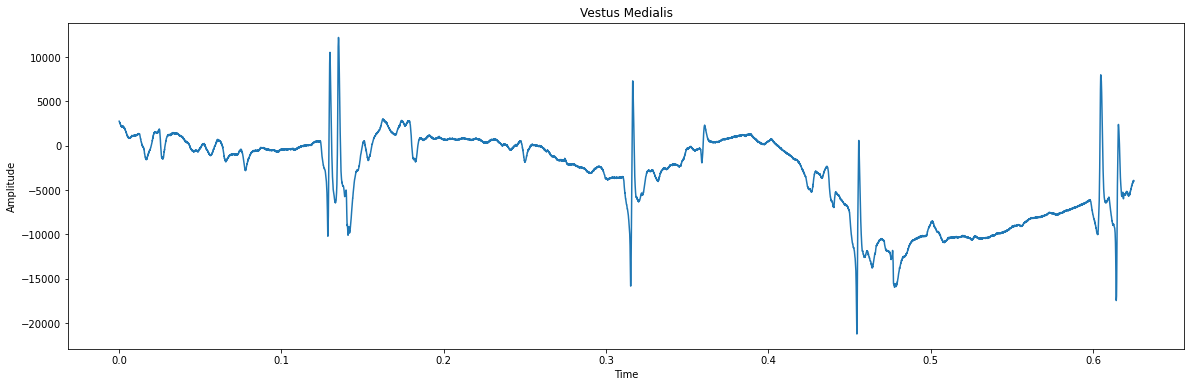

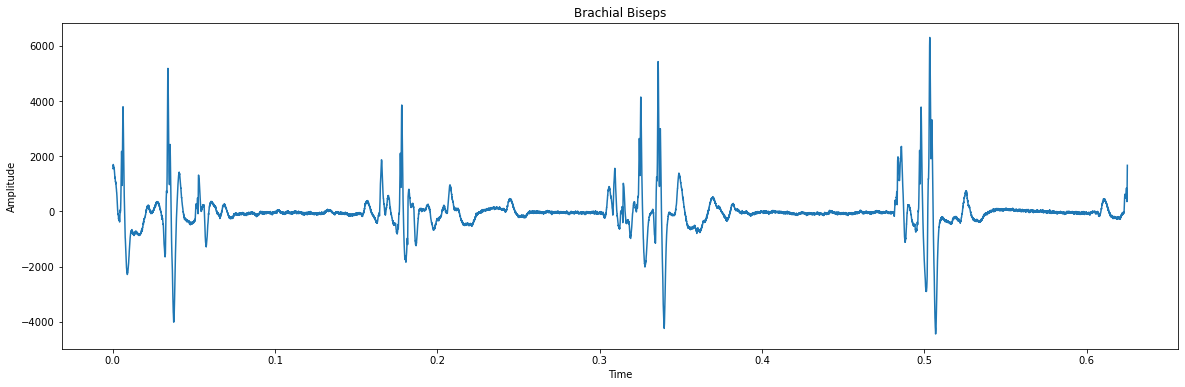

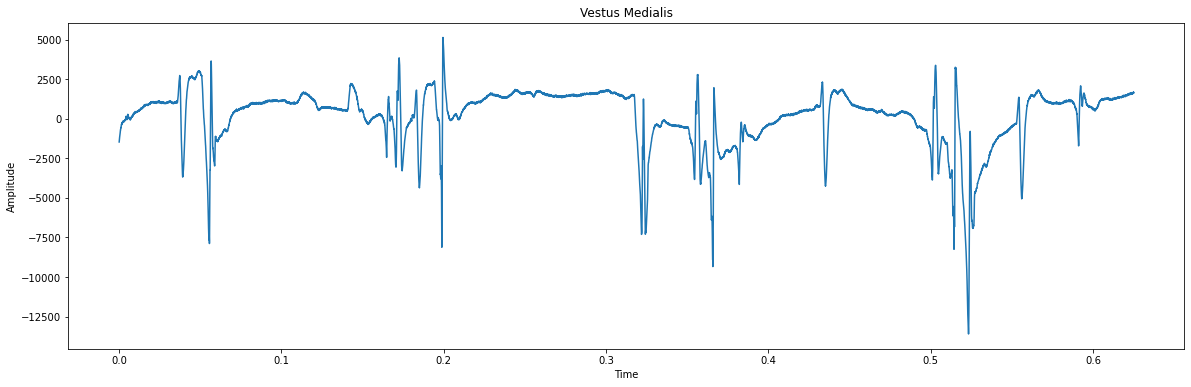

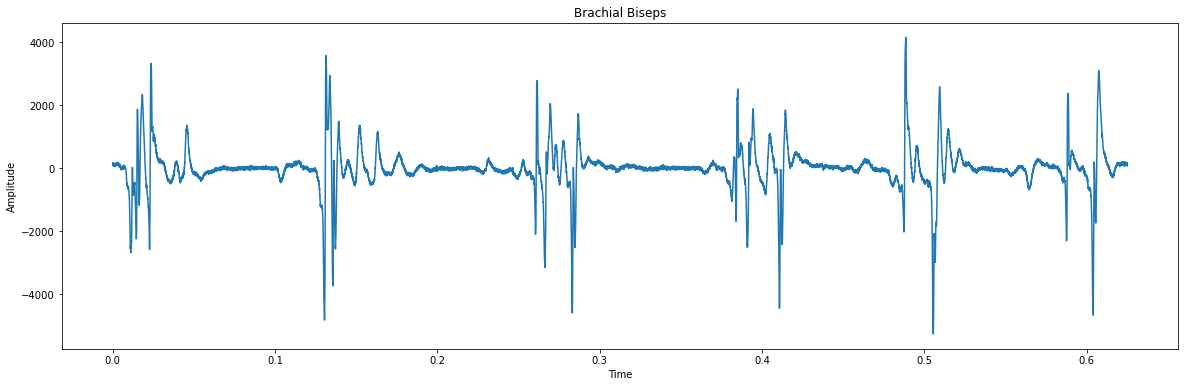

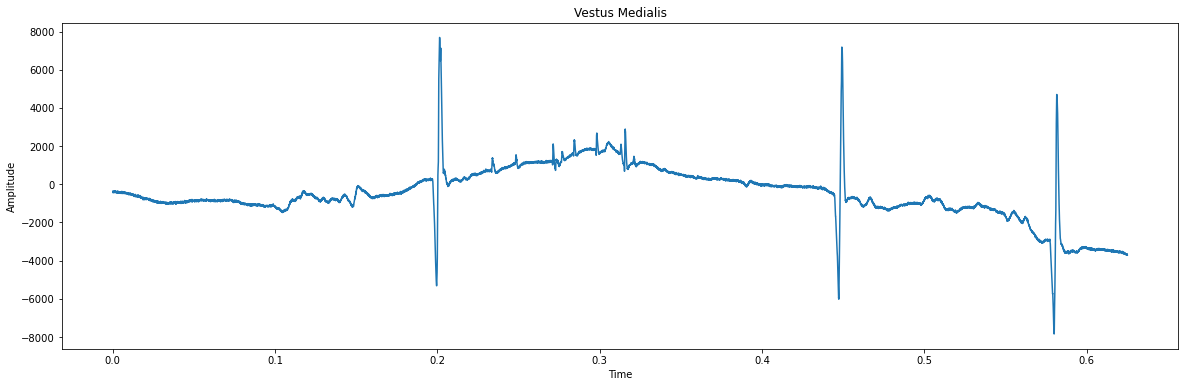

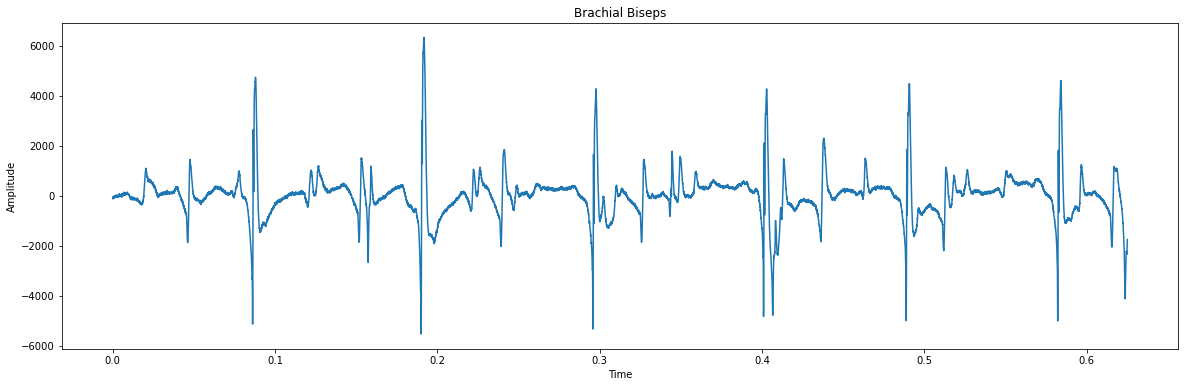

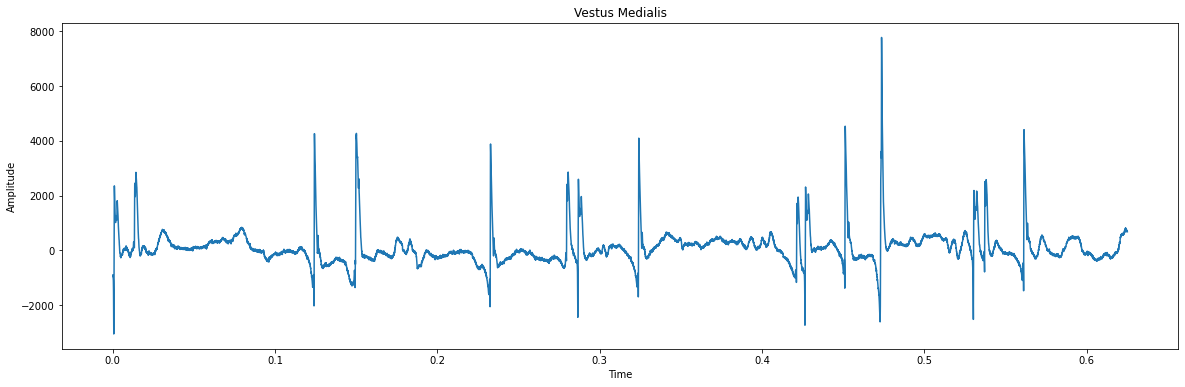

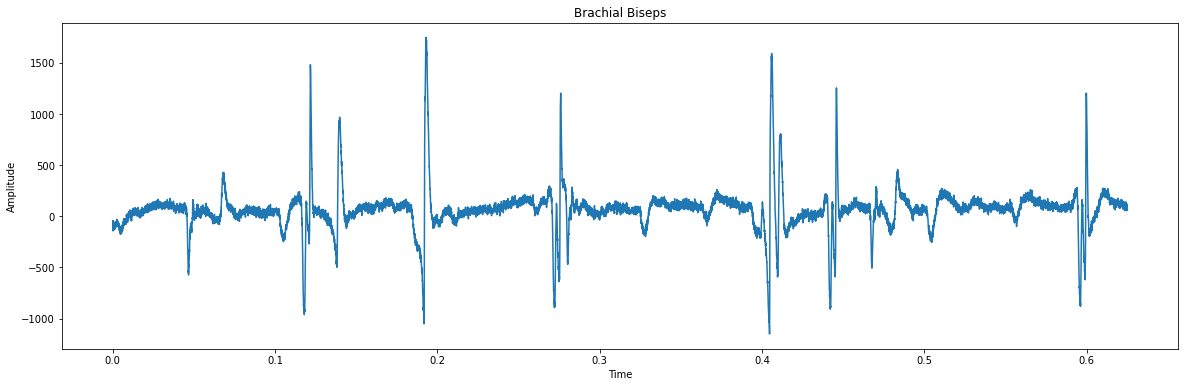

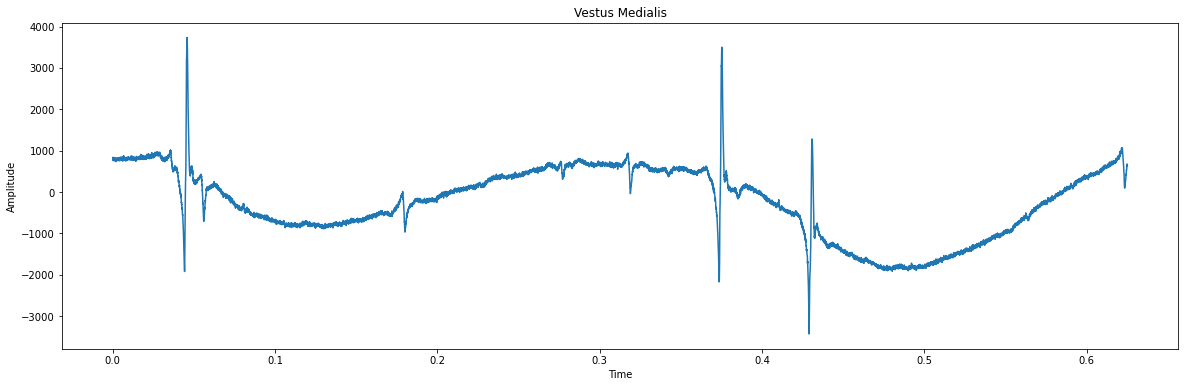

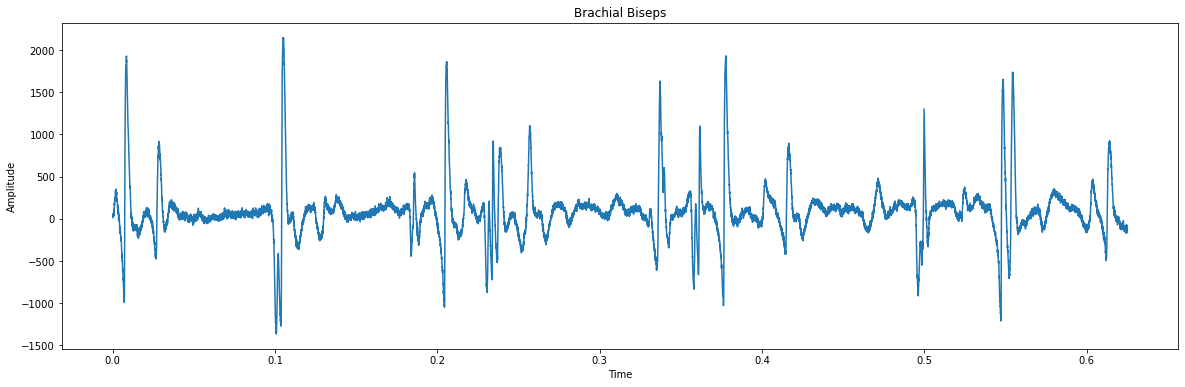

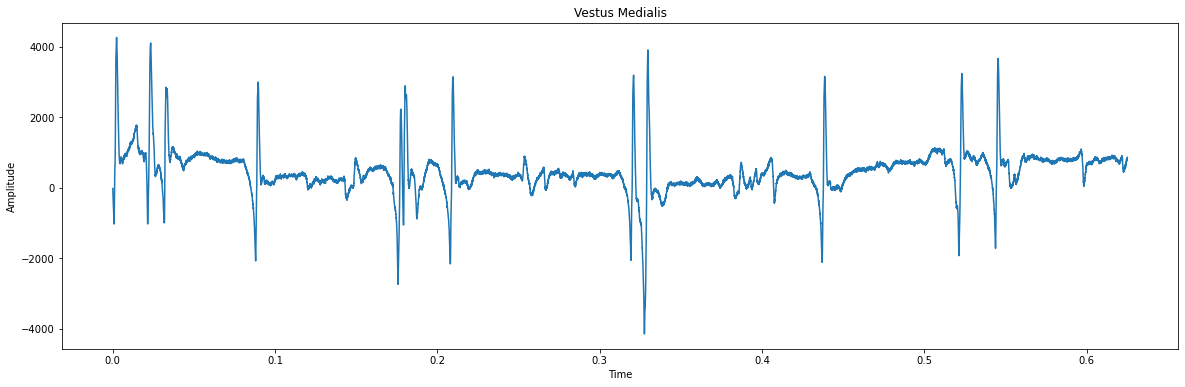

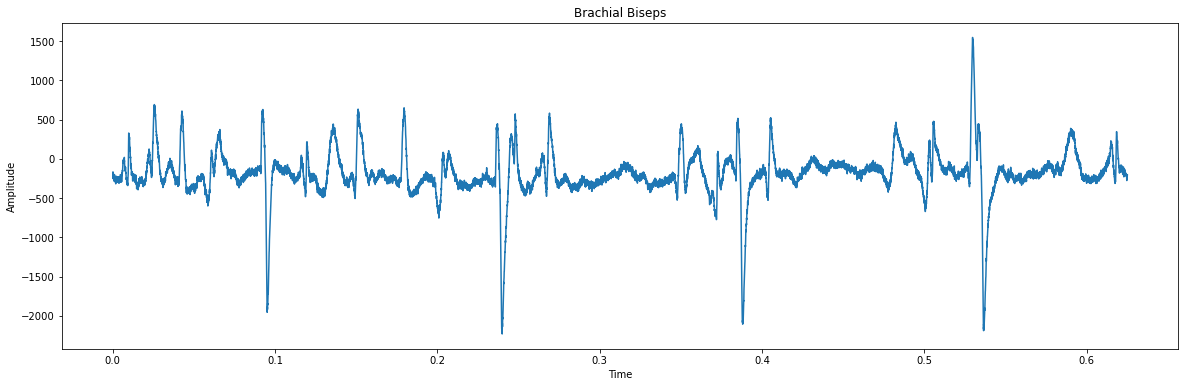

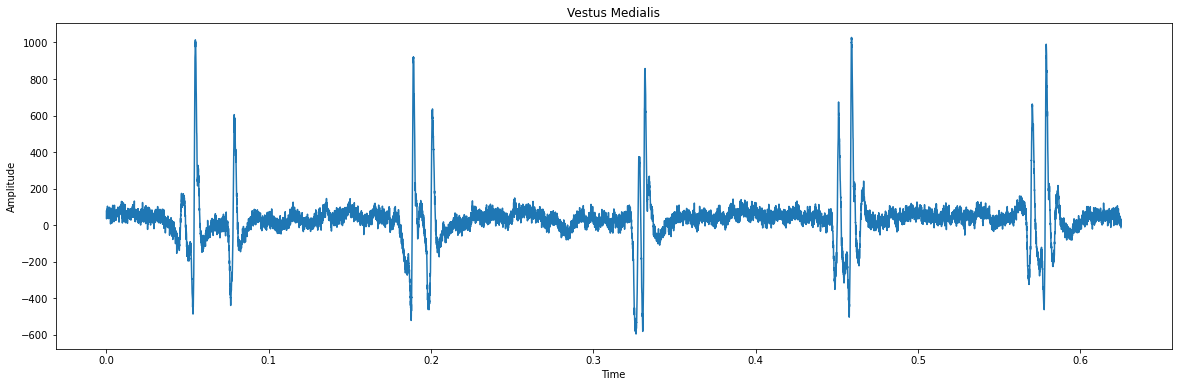

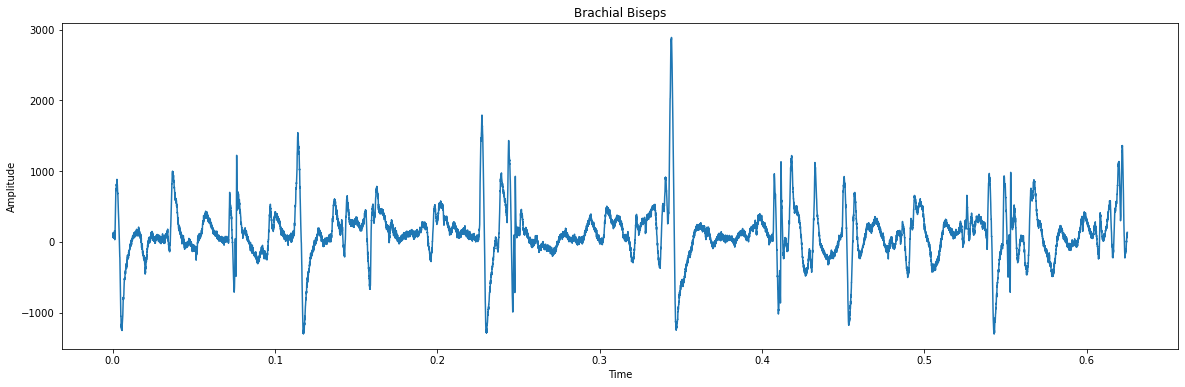

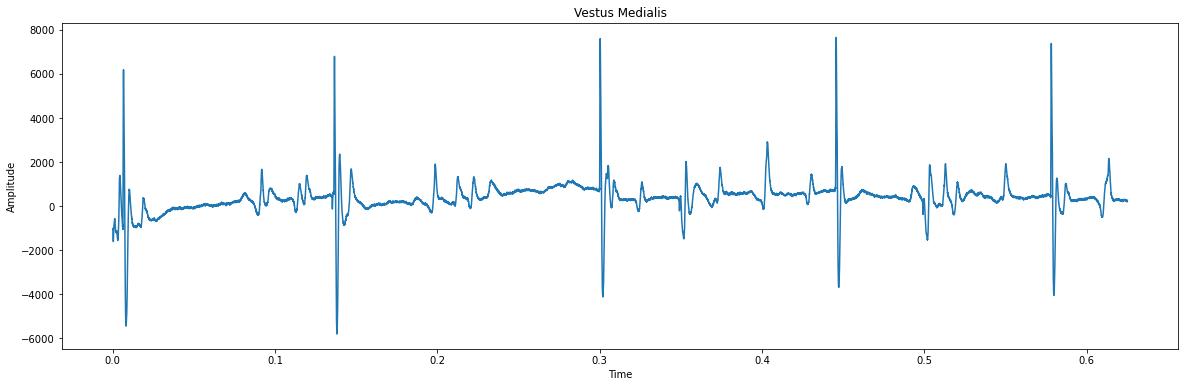

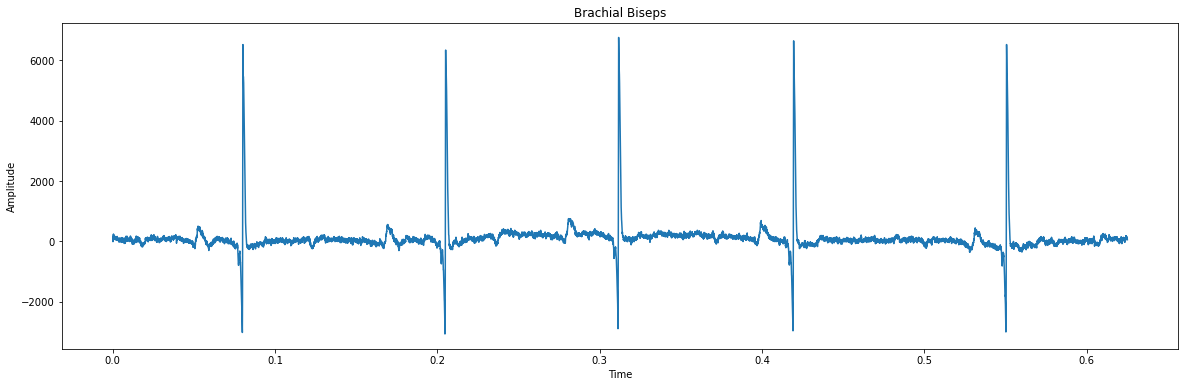

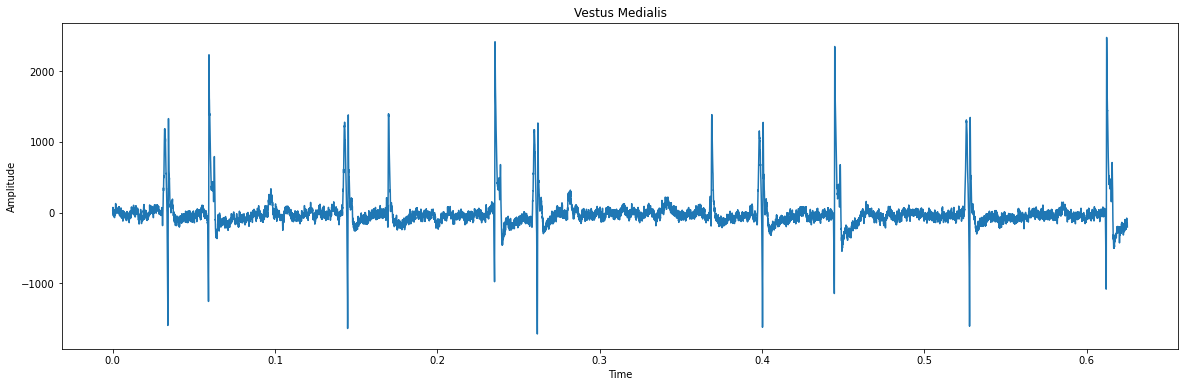

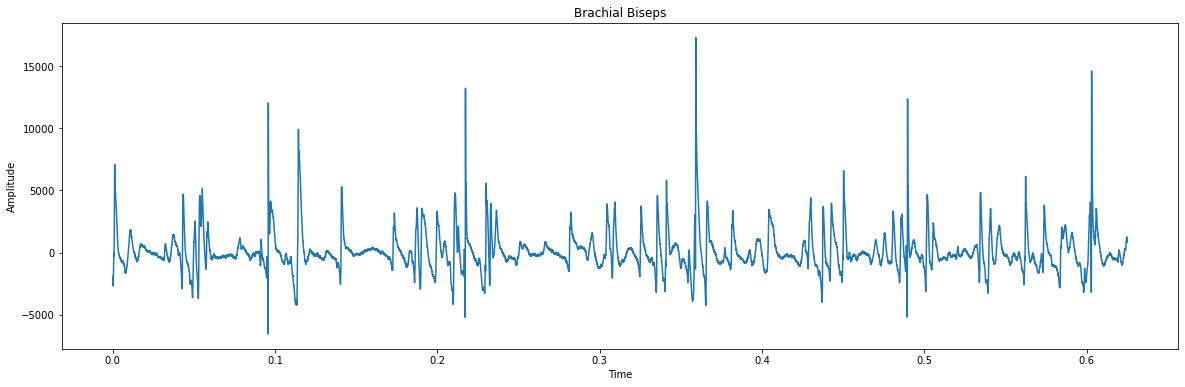

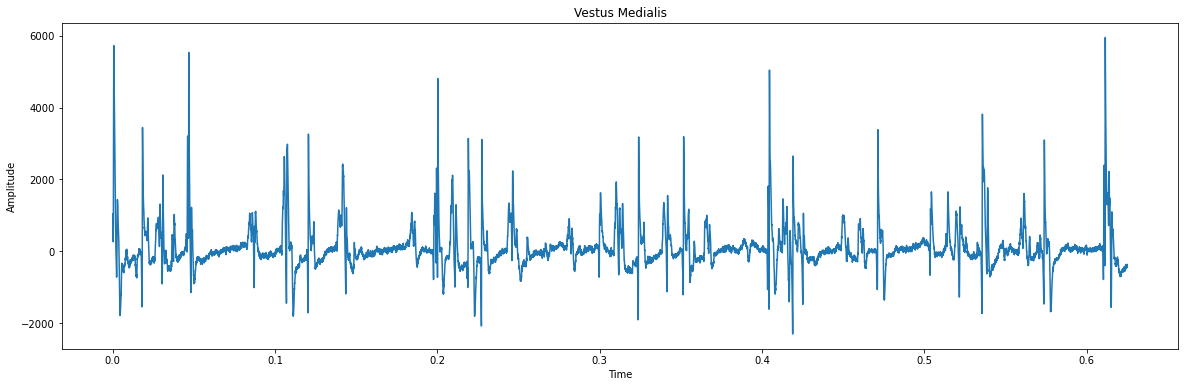

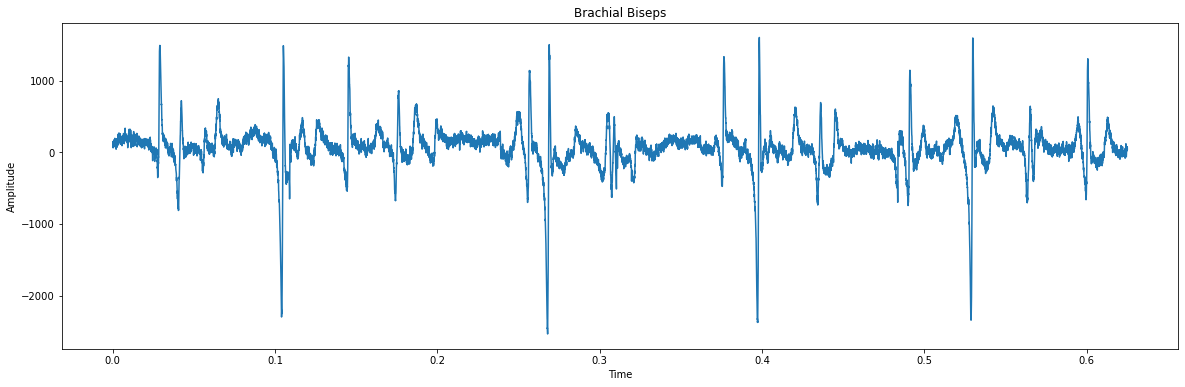

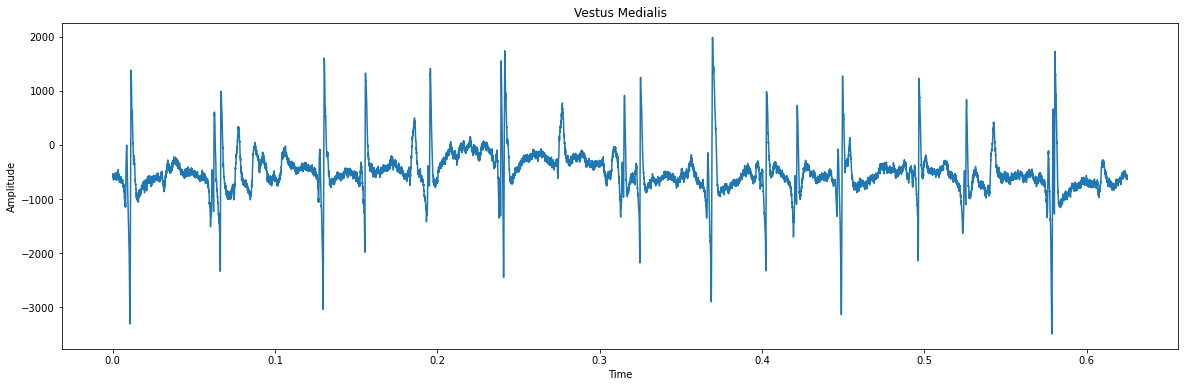

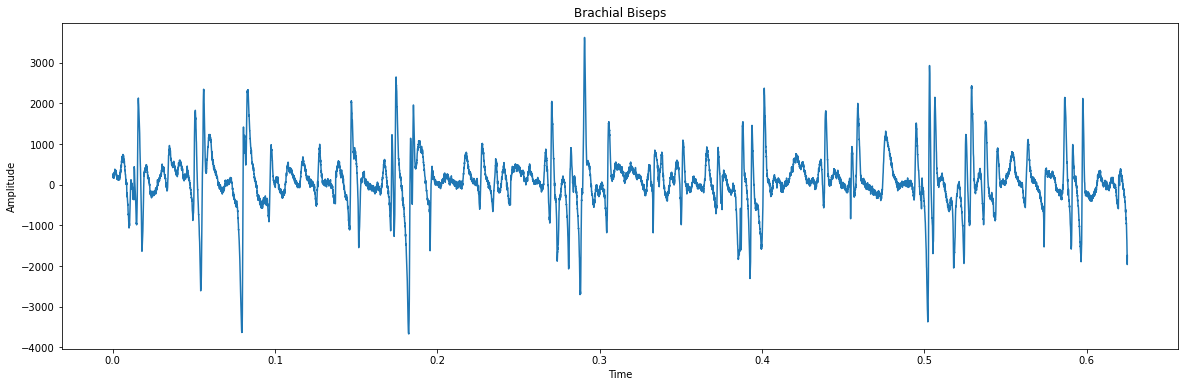

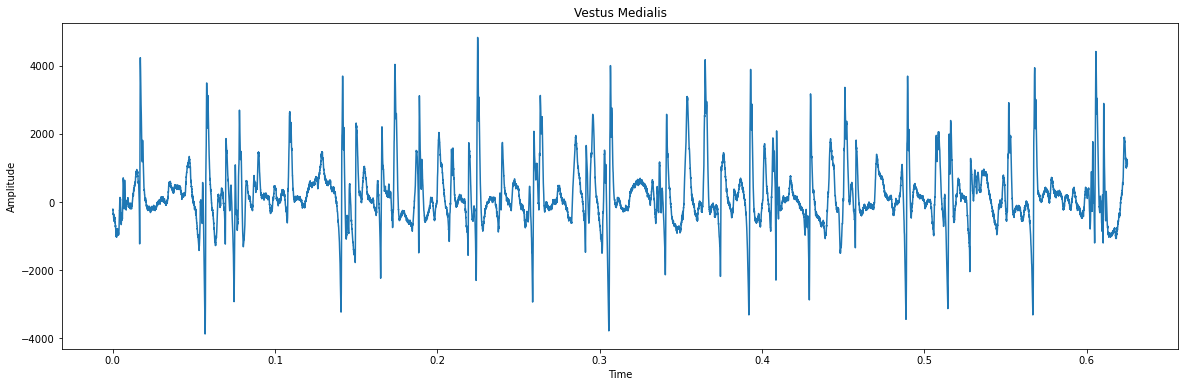

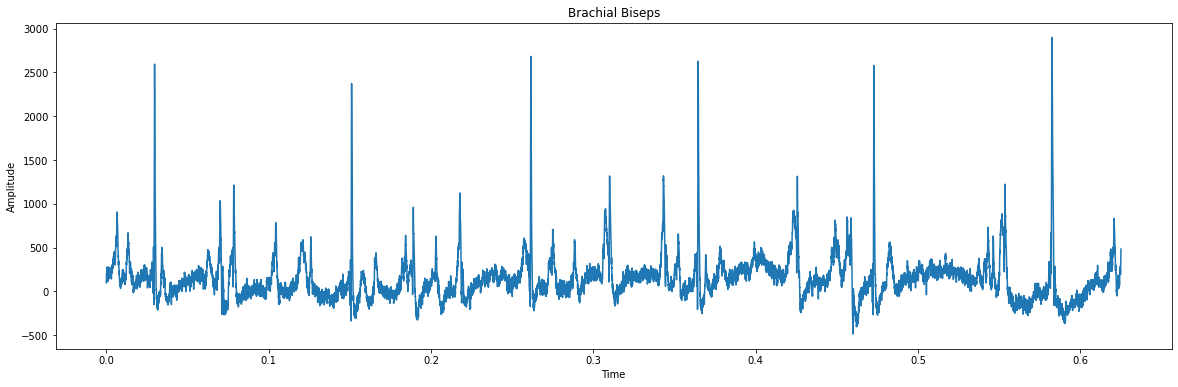

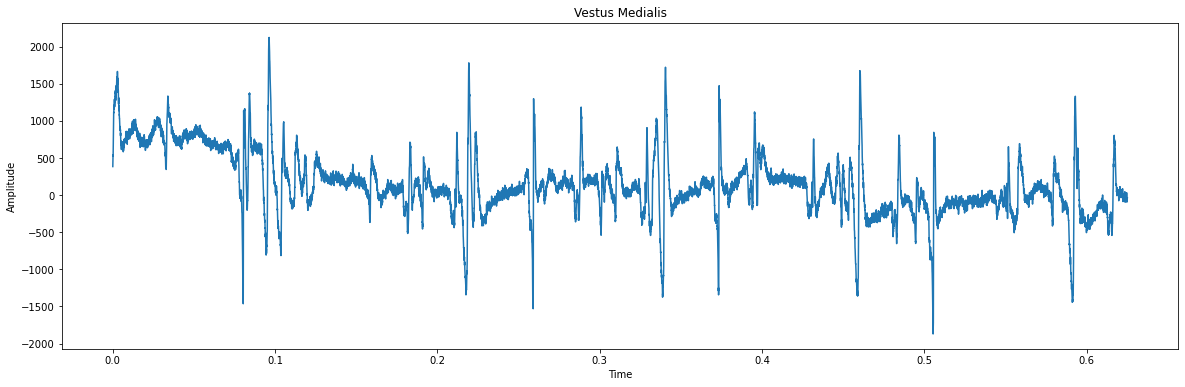

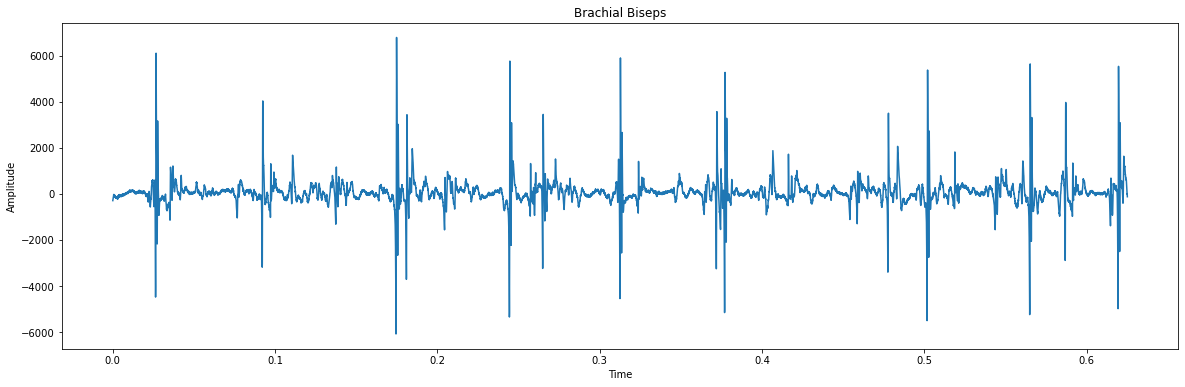

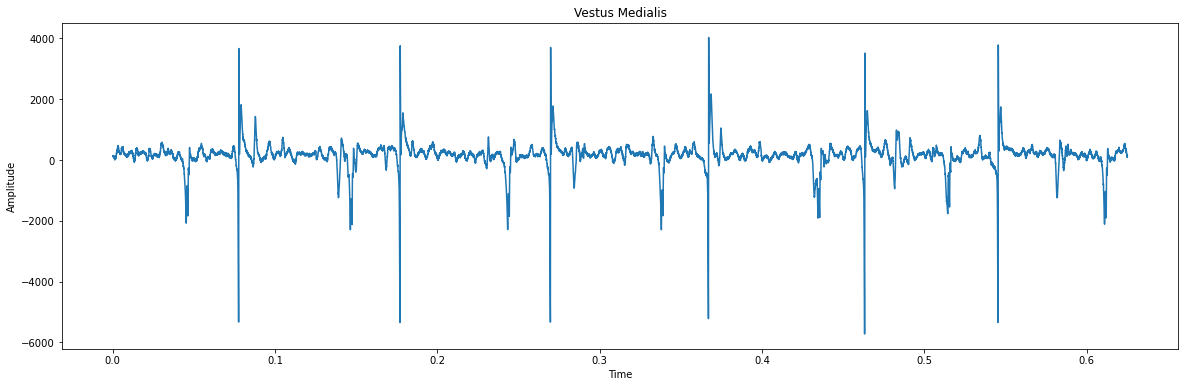

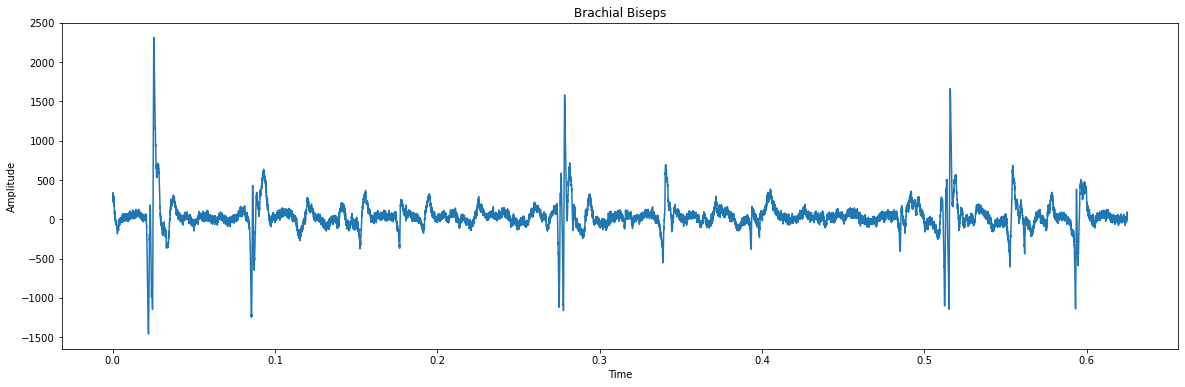

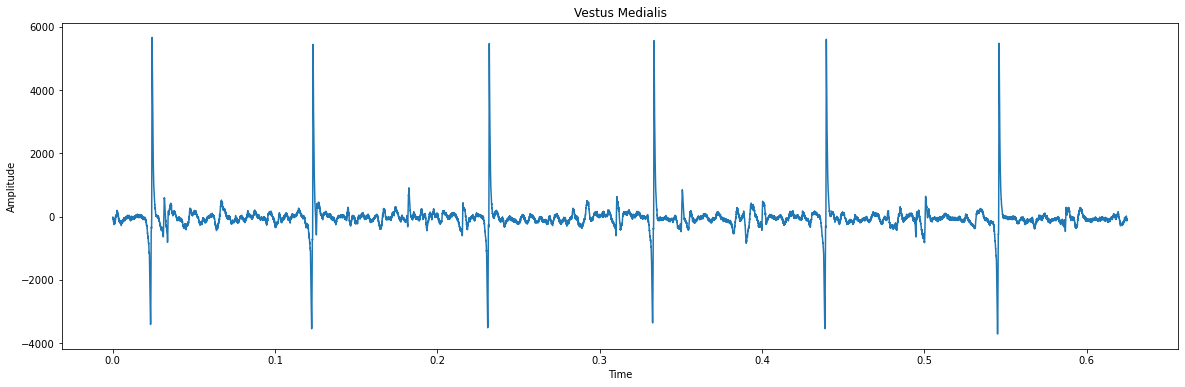

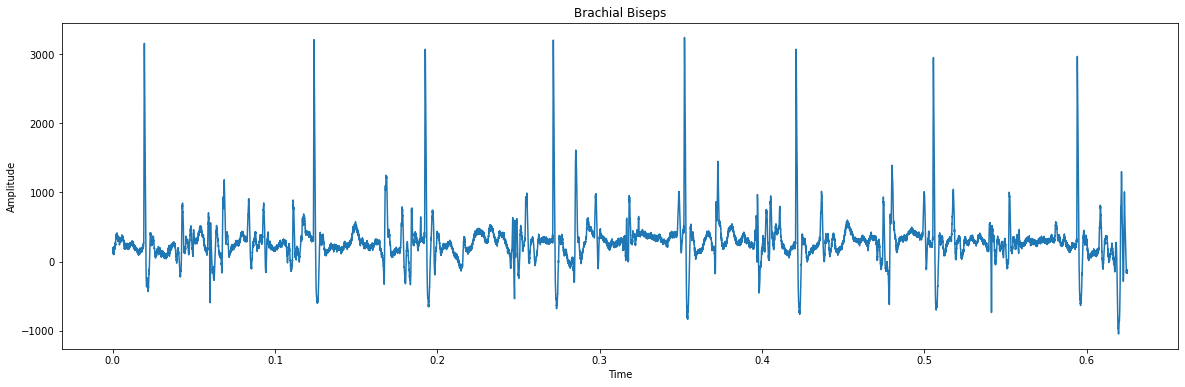

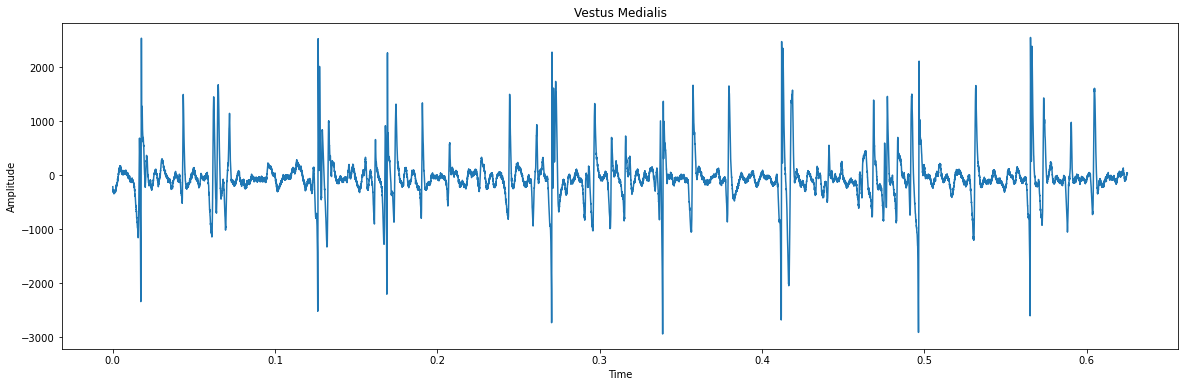

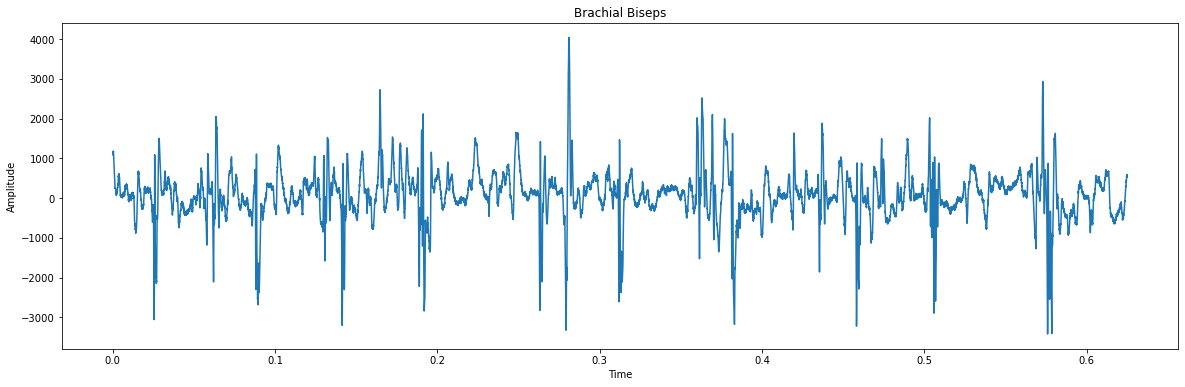

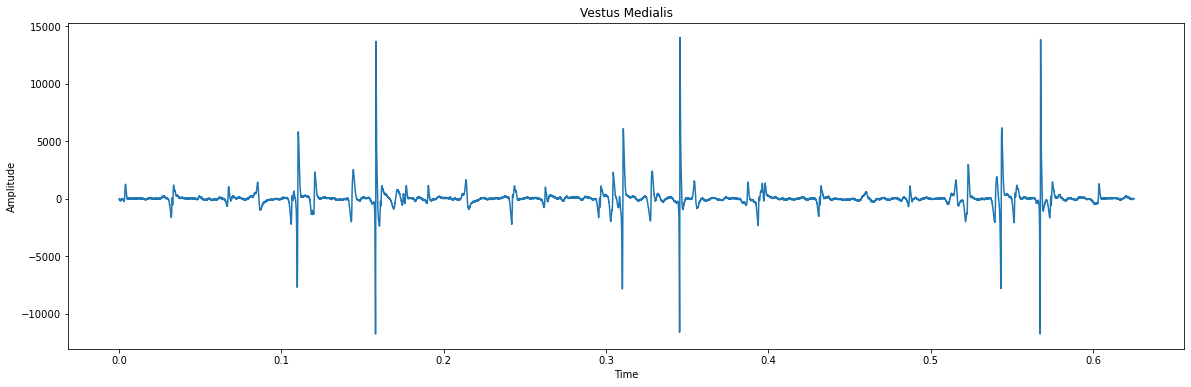

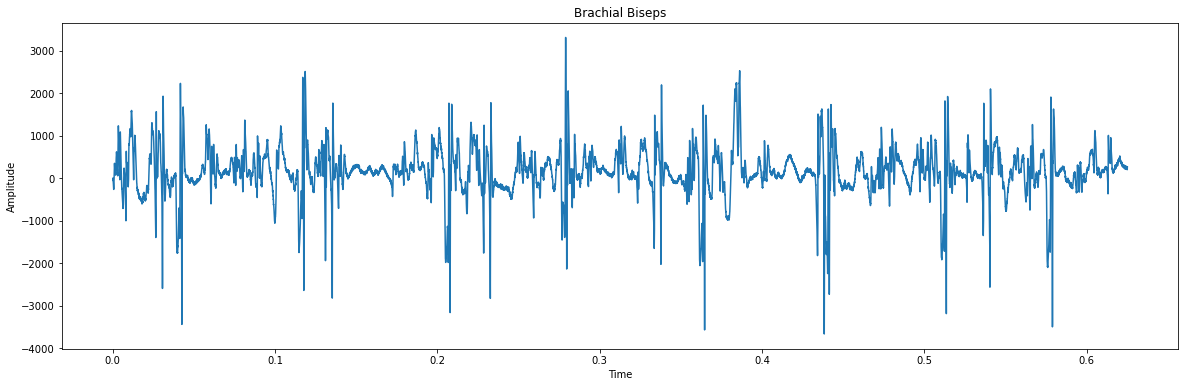

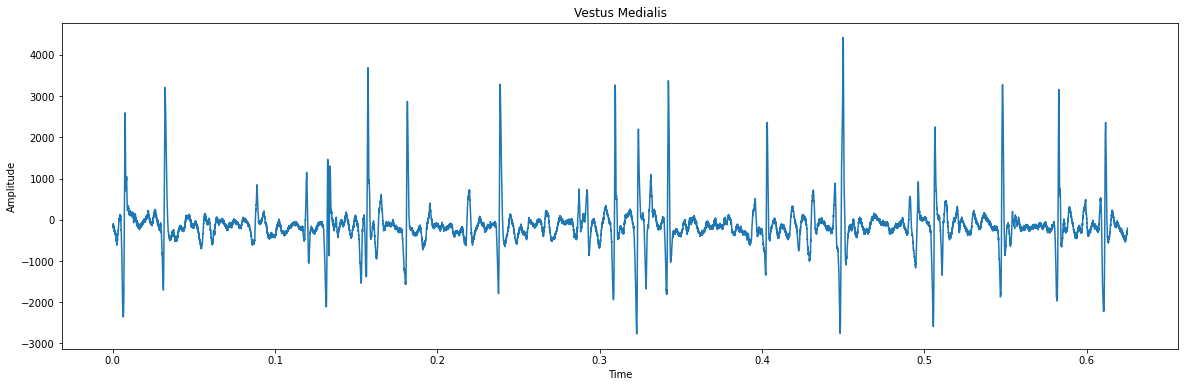

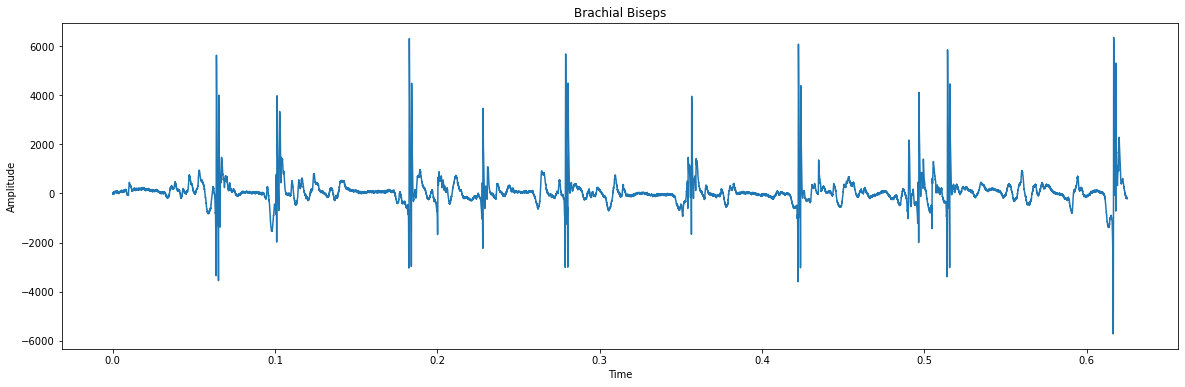

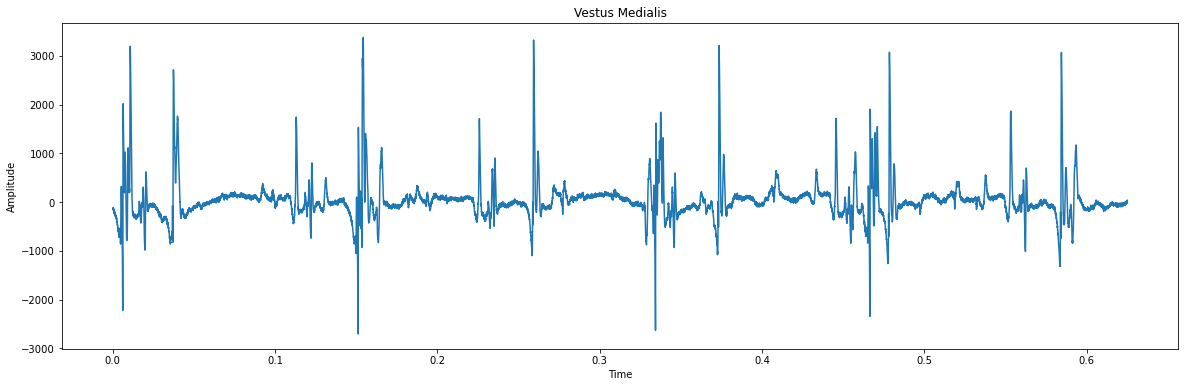

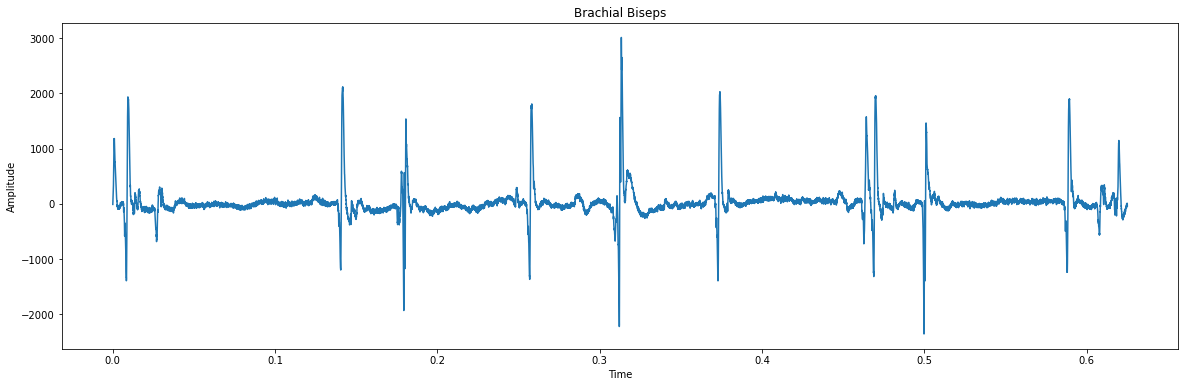

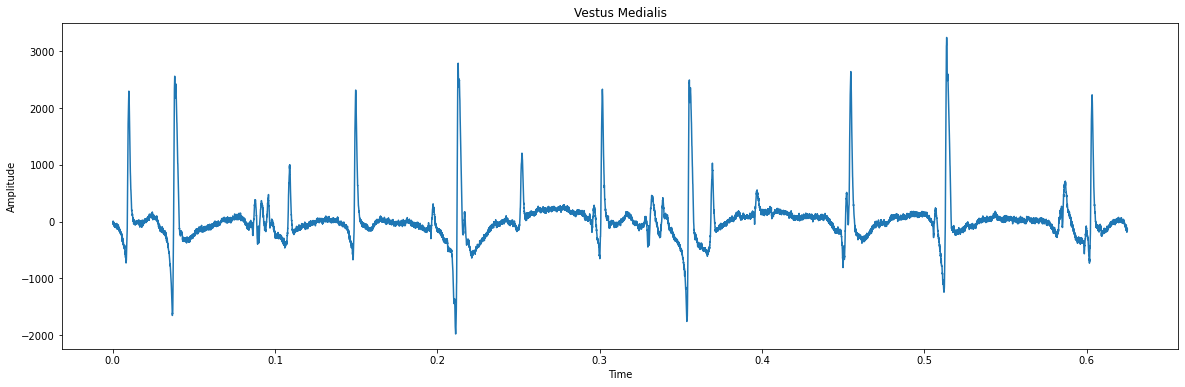

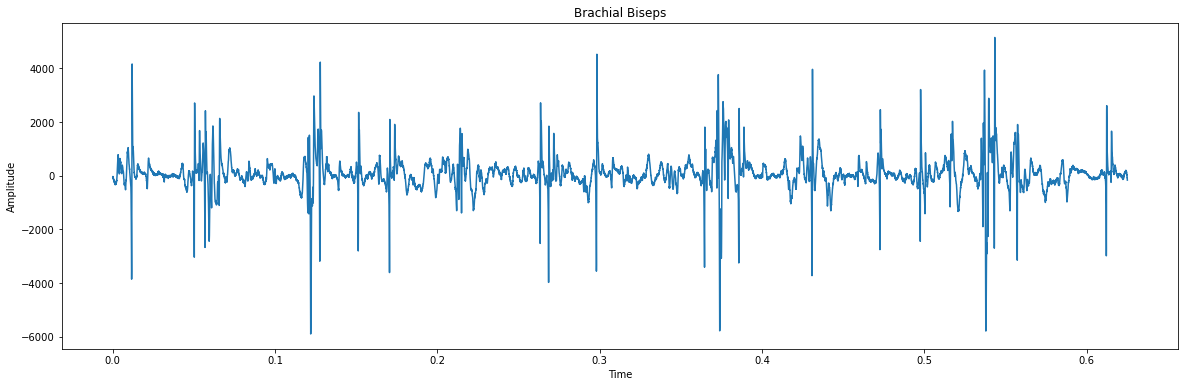

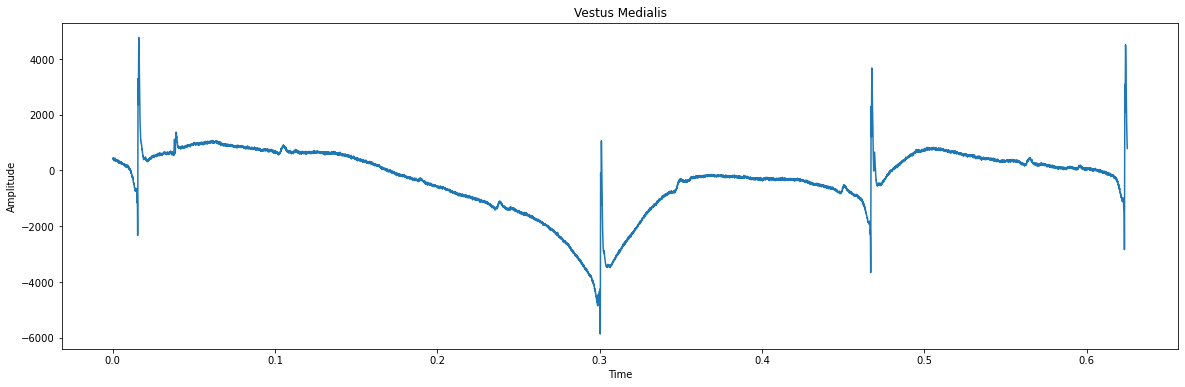

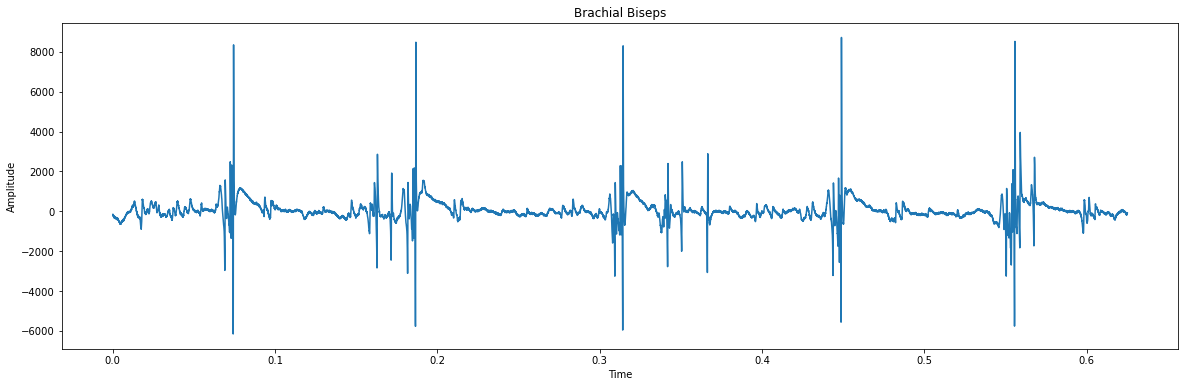

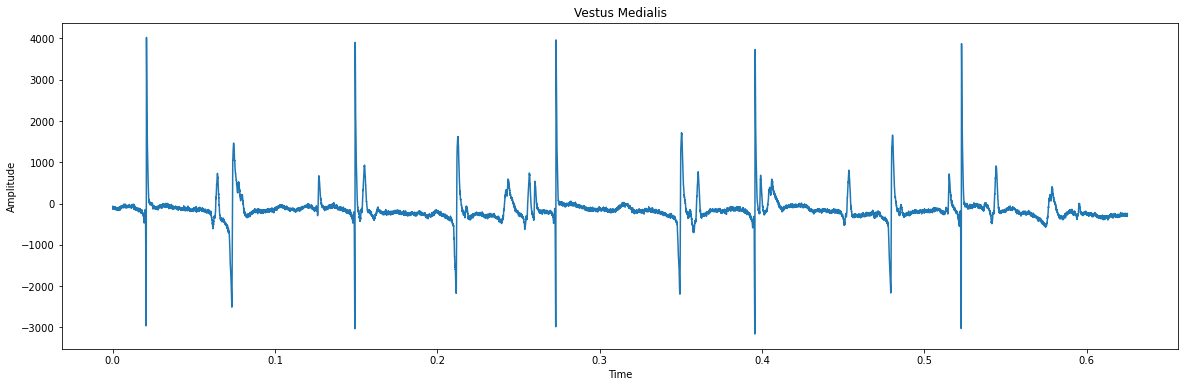

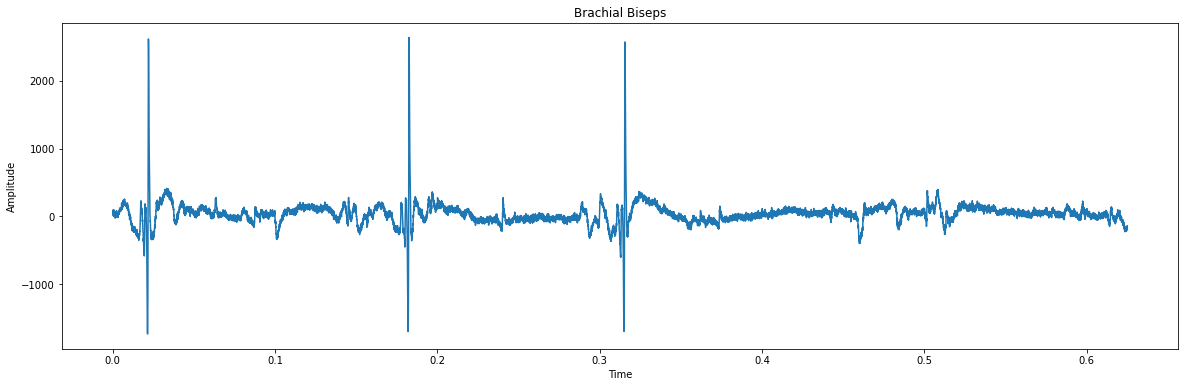

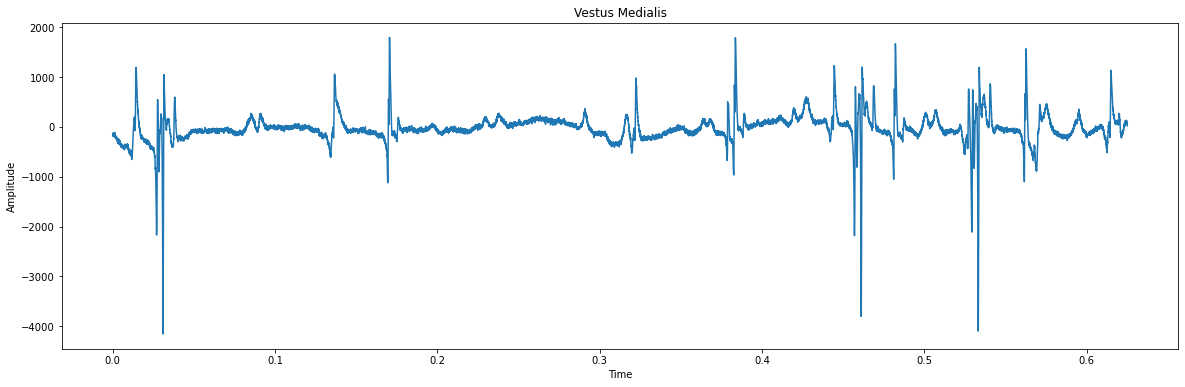

In [15]:
X = []
y = []
for i in range(len(datatotal)):
    for j in range(len(datatotal[i][0])):
        #1. Baca Data
        dataBB1 = np.fromfile(datatotal[i][0][j][0], np.int16)
        dataVM1 = np.fromfile(datatotal[i][0][j][1], np.int16)
        y1,y2,df = bacaData(dataBB1,dataVM1)
        y.append(i) #append label sesuai nilai i
        xx1 = Scaling(df) #Standarisasi data
        
        #2. PCA
        principalDf1= cariPCA(df,xx1)
        
        #3. DWT
        coeffs1_1,coeffs1_2 = decomps(principalDf1)
        coeffs1_1 = np.array(coeffs1_1)
        coeffs1_2 = np.array(coeffs1_2)
        
        #4. Ekstraksi Ciri
        ciri1 = Ekstrak1(coeffs1_1,coeffs1_2)    
        
        #5. Ciri append ke X
        X.append(ciri1)

In [16]:
#Dimensi koefisien setiap level DWT
print('D1 : ',coeffs1_1[6].shape)
print('D2 : ',coeffs1_1[5].shape)
print('D3 : ',coeffs1_1[4].shape)
print('D4 : ',coeffs1_1[3].shape)
print('D5 : ',coeffs1_1[2].shape)
print('D6 : ',coeffs1_1[1].shape)
print('A6 : ',coeffs1_1[0].shape)

D1 :  (6253,)
D2 :  (3130,)
D3 :  (1568,)
D4 :  (787,)
D5 :  (397,)
D6 :  (202,)
A6 :  (202,)


In [17]:
#Print dimensi setelah
print('Dimensi data : ',xx1.shape)
print('Dimensi Luaran PCA : ',principalDf1.shape)
print('Dimensi Coeffs1 : ',coeffs1_1.shape)
print('Dimensi Coeffs2 : ',coeffs1_2.shape)
print('Dimensi Ciri : ',ciri1.shape)

Dimensi data :  (12500, 2)
Dimensi Luaran PCA :  (12500, 2)
Dimensi Coeffs1 :  (7,)
Dimensi Coeffs2 :  (7,)
Dimensi Ciri :  (14, 3)


In [19]:
XX = np.array(X)
print('Dimensi X awal : ',XX.shape)
XX_2 = XX.reshape(30,42) #Reshape ciri 3 dimensi menjadi 2 dimensi
print('Dimensi X flattened : ',XX_2.shape)
YY = np.array(y)
print('Dimensi y : ',YY.shape)

Dimensi X awal :  (30, 14, 3)
Dimensi X flattened :  (30, 42)
Dimensi y :  (30,)


## 4. Classification (Random Forest)

In [20]:
#Menggunakan library sklearn
#Memisah dataset menjadi data training dan data test
X_train, X_test, y_train, y_test = train_test_split(XX_2,y,test_size=0.3)

In [21]:
#Buat model Random Forest dengan fungsi sklearn
#Fitting Random Forest
clf = RandomForestClassifier()
clf.fit(X_train,y_train)

RandomForestClassifier()

In [22]:
#Prediksi nilai y dari data train
y_predt = clf.predict(X_train)
#Prediksi nilai y dari data test
y_pred = clf.predict(X_test)

### Hasil Klasifikasi Data Train

In [23]:
#Memperlihatkan hasil klasifikasi dengan fungsi confusion matrix dan classification report
print(confusion_matrix(y_train, y_predt))
print(classification_report(y_train, y_predt))

[[7 0 0]
 [0 7 0]
 [0 0 7]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         7

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



### Hasil Klasifikasi Data Test

In [24]:
#Hasil klasifikasi data test
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1 2 0]
 [0 3 0]
 [0 1 2]]
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.50      1.00      0.67         3
           2       1.00      0.67      0.80         3

    accuracy                           0.67         9
   macro avg       0.83      0.67      0.66         9
weighted avg       0.83      0.67      0.66         9



## Validasi Data Tunggal

          Time  Amplitude(Brachial Biceps)  Amplitude(Vestus Medialis)
0      0.00005                         -67                        1000
1      0.00010                         -45                         977
2      0.00015                         -39                        1009
3      0.00020                         -39                        1035
4      0.00025                         -38                        1035
...        ...                         ...                         ...
12495  0.62480                          73                        1002
12496  0.62485                         107                        1005
12497  0.62490                         103                        1012
12498  0.62495                         113                        1024
12499  0.62500                          94                        1045

[12500 rows x 3 columns]
Dimensi data :  (12500, 2)
Dimensi Luaran PCA :  (12500, 2)
Dimensi Coeffs1 :  (7,)
Dimensi Coeffs2 :  (7,)
Dimensi Ciri :

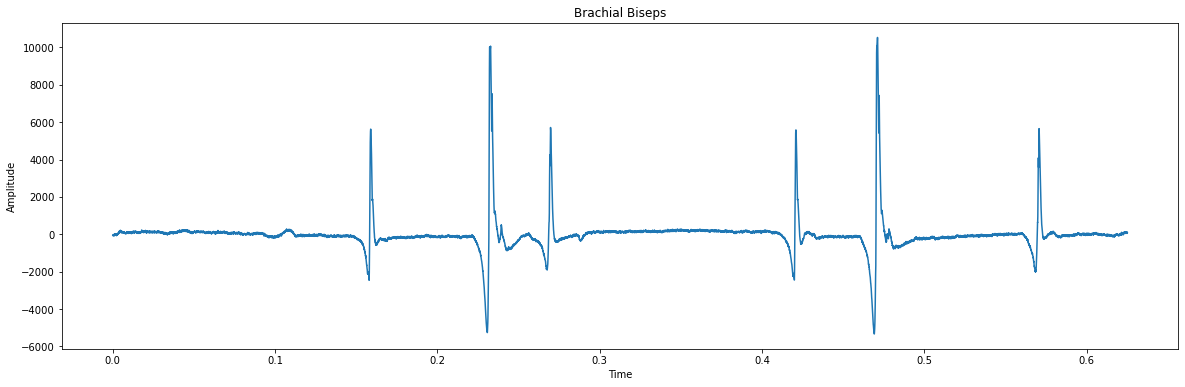

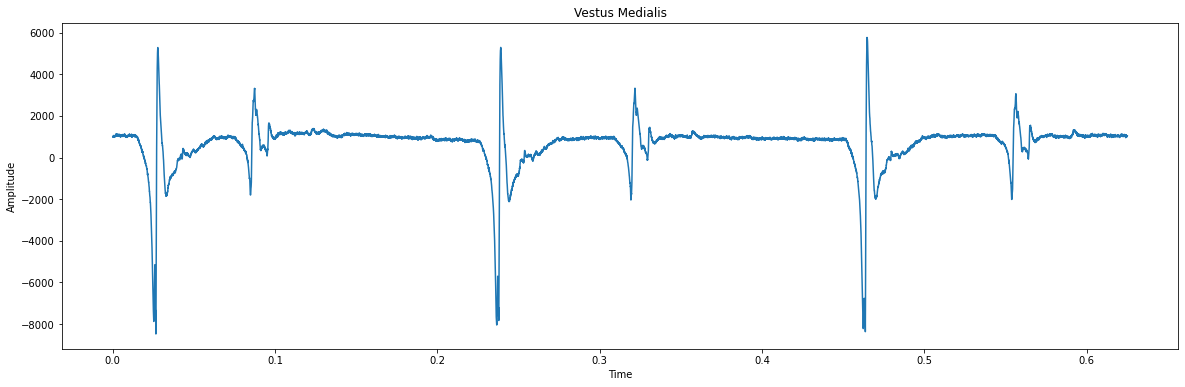

In [25]:
#1. Baca Data
dataBB2 = np.fromfile('N2001A03BB51.bin', np.int16) #Coba menggunakan data pasien ALS baru
dataVM2 = np.fromfile('N2001A03VM51.bin', np.int16)
y3,y4,df2 = bacaData(dataBB2,dataVM2)
xx2 = Scaling(df2) #Standarisasi data
print('Dimensi data : ',xx2.shape)

#2. PCA
principalDf2= cariPCA(df2,xx2)
print('Dimensi Luaran PCA : ',principalDf2.shape)

#3. DWT
coeffs2_1,coeffs2_2 = decomps(principalDf2)
coeffs2_1 = np.array(coeffs2_1)
coeffs2_2 = np.array(coeffs2_2)
print('Dimensi Coeffs1 : ',coeffs2_1.shape)
print('Dimensi Coeffs2 : ',coeffs2_2.shape)

#4. Ekstraksi Ciri
ciri2 = Ekstrak1(coeffs2_1,coeffs2_2)
print('Dimensi Ciri : ',ciri2.shape)

#Reshape menjadi matriks 2 dimensi
ciri2 = np.array(ciri2)
ciri2_2 = ciri2.reshape(1,42)
print('Dimensi Masukan Random Forest : ',ciri2_2.shape)

### Hasil Prediksi Data Tunggal

In [26]:
y_pred2 = clf.predict(ciri2_2)
print(y_pred2)

if y_pred2 == 0:
    print('Prediksi : ALS')
elif y_pred2 == 1:
    print('Prediksi : Normal')
elif y_pred2 == 2:
    print('Prediksi : Myopathy')

[0]
Prediksi : ALS
